<a href="https://colab.research.google.com/github/lama-a1/IT326-Project-Fitness/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT326 Project - Phase1**
---

### **Fitness**

##### Fitness is an important indicator of health and well-being. This dataset contains measurements that help us analyze and predict whether an individual is fit or not fit.Fitness is an important indicator of health and well-being. This dataset contains measurements that help us analyze and predict whether an individual is fit or not fit.

### **The goal**



##### The goal of this project is to use data mining techniques to explore how various health and lifestyle attributes influence overall fitness. We focus on factors such as age, gender, height, weight, heart rate, blood pressure, sleep, nutrition quality, activity index, and smoking. By applying classification methods, and optionally clustering, we aim to reveal patterns that help predict fitness status.

### **General information about the dataset:**

##### The dataset contains comprehensive measurements aimed at analyzing fitness and its related factors. It includes various attributes that can be used to study the fitness status of individuals.

In [45]:
import pandas as pd
import os

df = pd.read_csv('fitness_dataset.csv') if os.path.exists('fitness_dataset.csv') else pd.read_csv('/mnt/data/fitness_dataset.csv')

num_attributes = len(df.columns)
attribute_types = df.dtypes.to_frame().rename(columns={0: 'Data Types'})
num_objects = len(df)
class_name = df.columns[-1]

print('\n\n\n------------------------------------')
print('Number of attributes:', num_attributes)
print('------------------------------------')
print('\nAttribute types:')
print(attribute_types)
print('------------------------------------')
print('\nNumber of objects:', num_objects)

print('------------------------------------')
print('\nClass attribute:', class_name)
counts = df[class_name].value_counts(dropna=False).sort_index()
counts_table = pd.DataFrame([counts.values], columns=counts.index, index=['count'])
print(counts_table.to_string())
print('------------------------------------')
print('\nSample of the raw dataset:\n')
print(df.head(10).to_string(index=False))




------------------------------------
Number of attributes: 11
------------------------------------

Attribute types:
                  Data Types
age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
------------------------------------

Number of objects: 2000
------------------------------------

Class attribute: is_fit
is_fit     0    1
count   1201  799
------------------------------------

Sample of the raw dataset:

 age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  nutrition_quality  activity_index smokes gender  is_fit
  56        152         65        69.6           117.0          NaN               2.37            3.97     no      F       1
  69        186         95        60.8           114.8  

### **Attributes:**

---

#### The dataset contains multiple features related to fitness such as:
1. age: The age of the individual in years.
2. height_cm: The height of the person in centimeters.
3. weight_kg: The weight of the person in kilograms..
4. heart_rate: Average heart rate (beats per minute).
5. blood_pressure: Average blood pressure measurement (systolic/diastolic combined).
6. sleep_hours: Average hours of sleep per day.
7. nutrition_quality: A score representing the quality of the individual’s nutrition (higher = better diet).
8. activity_index: A numeric index that represents the activity or exercise level of the person.
9. smokes: Whether the individual smokes (yes, no, or numeric code for non-smoker).
10. gender: Gender of the individual (M/F).
11. is_fit: Target variable indicating whether the person is fit (1 = fit, 0 = not fit). This is the class attribute used for classification tasks.

Data type: The dataset features numeric and categorical variables.

Number of records (objects): The dataset consists of approximately 2000 data entries.

Class labels: The dataset focuses on detecting whether a person is fit, using 1 "Fit" and 0 "Not Fit".


## **Source of dataset**

The source from kaggle.com

#### https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic?select=fitness_dataset.csv


# **IT326 Project - Phase2**
---



This phase aims to explore and preprocess the dataset using techniques like

*   List item
*   List item

visualization, outlier detection, handling missing values, normalization, and feature selection to enhance data quality and prepare it for further analysis.




### **Creating Sample:**

---



In [46]:
import warnings
import pandas as pd

fitness_df = pd.read_csv("fitness_dataset.csv")

In [47]:
# Filter the data
fit_ones = fitness_df[fitness_df['is_fit'] == 1]
fit_zeros = fitness_df[fitness_df['is_fit'] == 0]

# Calculate remaining sample size
remaining_sample_size = 1000 - len(fit_ones)

# Sample from the non-fit group
fit_zeros_sample = fit_zeros.sample(n=remaining_sample_size, random_state=42)

# Combine the two groups
sample = pd.concat([fit_ones, fit_zeros_sample], ignore_index=True)

# Display the sample
display(sample)

age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0     56        152         65        69.6           117.0          NaN   
1     69        186         95        60.8           114.8          7.5   
2     32        189         83        60.2           130.1          7.0   
3     60        175         99        58.1           115.8          8.0   
4     38        188         57        81.2           110.6          6.6   
..   ...        ...        ...         ...             ...          ...   
995   36        193        101        88.1           132.9          6.1   
996   79        160         57        55.4           102.4          6.1   
997   42        158        117        74.7           135.2          9.2   
998   76        162         63        82.4           102.0          8.0   
999   51        171         96        79.6           104.3          5.8   

     nutrition_quality  activity_index smokes gender  is_fit  
0                 2.37            3.97     no      F       1  
1                 8.77            3.19      0      F       1  
2                 6.18            3.68      0      M       1  
3                 9.95            4.83    yes      F       1  
4                 8.47            4.96      0      M       1  
..                 ...             ...    ...    ...     ...  
995               3.06            2.42    yes      M       0  
996               6.31            1.19    yes      M       0  
997               9.43            1.13      0      M       0  
998               5.11            1.85      0      F       0  
999               0.17            1.93     no      F       0  

[1000 rows x 11 columns]

#### **Duplicates:**

This code checks if the dataset contains any duplicate rows that have the same values across all columns.

---





In [48]:
duplicates_sum = sample.duplicated().sum()
print(duplicates_sum)

0


### **Missing values:**
The dataset shows 79 missing values records in the **sleep_hours** column.

---




In [49]:
missing_values = sample.isna()
missing_counts = missing_values.sum()
print(missing_counts)

age                   0
height_cm             0
weight_kg             0
heart_rate            0
blood_pressure        0
sleep_hours          79
nutrition_quality     0
activity_index        0
smokes                0
gender                0
is_fit                0
dtype: int64


### **Statistical Summary**
#### The following summarizes the main numeric attributes in the dataset, highlighting their ranges, averages, and key distribution points (Min, Q1, Q2, Q3, and Max):


---


##### **Using summary_stats function:**
- Age:  
The ages range from 18 to 79 years, with an average of about 45.8 years. Half of the participants are between 30.8 and 60 years old, showing that the dataset covers multiple age groups but is centered more around middle-aged adults.  

- Height (cm):  
Heights range from 150 cm to 199 cm, with an average of 175.6 cm. The middle 50% of individuals fall between 163 cm and 188 cm, which represents typical adult heights.  

- Weight (kg):  
Weights range from 30 kg to 250 kg, with an average of 81.7 kg. Half of the individuals weigh between 63 kg and 98 kg. A few extremely high weights indicate the presence of outliers.  

- Heart Rate:  
The heart rate values range from 45 bpm to 118.6 bpm, with an average of 70.5 bpm. Most individuals fall between 62 bpm and 78 bpm, which is consistent with normal resting heart rates.  

- Blood Pressure:  
Blood pressure ranges from 90 to 171 mmHg, with an average of 119 mmHg. The middle 50% of individuals are between 110 mmHg and 129 mmHg, suggesting mostly normal values, with some higher outliers.  

- Sleep Hours:  
Sleep duration ranges from 4 to 12 hours, with an average of 7.6 hours. Half of the individuals sleep between 6.6 and 8.7 hours. However, this column contains about 79 missing values, which need to be addressed during preprocessing.  

- Nutrition Quality:  
Nutrition quality scores range from 0.07 to 10, with an average of 5.6. The middle 50% are between 3.2 and 8.3, showing diverse eating habits.  

- Activity Index:  
The activity index ranges from 1.0 to 4.99, with an average of 3.3. Half of the population scores between 2.5 and 4.3, indicating moderate to high activity levels.  

- is_fit (Class Label):  
The target variable ranges between 0 and 1. Around 80% of the individuals are fit (is_fit = 1), while about 20% are not fit (is_fit =0).

In [50]:
# Select numeric columns for summary
specific_columns = sample[['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit']]
summary_stats = specific_columns.describe()
display(summary_stats)

age    height_cm    weight_kg   heart_rate  blood_pressure  \
count  1000.000000  1000.000000  1000.000000  1000.000000     1000.000000   
mean     45.841000   175.599000    81.663000    70.519400      119.379100   
std      17.549579    14.329953    23.916049    11.853176       14.429215   
min      18.000000   150.000000    30.000000    45.000000       90.000000   
25%      30.750000   163.000000    63.000000    61.900000      109.600000   
50%      45.000000   176.000000    81.000000    70.400000      119.600000   
75%      60.000000   188.000000    98.250000    78.900000      129.300000   
max      79.000000   199.000000   250.000000   118.600000      171.200000   

       sleep_hours  nutrition_quality  activity_index       is_fit  
count   921.000000        1000.000000     1000.000000  1000.000000  
mean      7.625950           5.639110        3.322890     0.799000  
std       1.511194           2.844501        1.091133     0.400949  
min       4.000000           0.070000        1.010000     0.000000  
25%       6.600000           3.187500        2.487500     1.000000  
50%       7.600000           5.945000        3.430000     1.000000  
75%       8.700000           8.255000        4.282500     1.000000  
max      12.000000          10.000000        4.990000     1.000000

#### **The Variance:**
---

##### **- Low Variance Attributes:**
Height, Heart Rate, Blood Pressure, Sleep Hours, and Activity Index: These attributes show similar values across individuals, suggesting that participants in the dataset have relatively close physical measurements and lifestyle indicators. Most people have comparable vital signs and sleeping patterns, reflecting consistency in these health-related variables.  

##### **- High Variance Attributes:**  
Weight and Nutrition Quality: These attributes exhibit a wide range of values, indicating significant differences in body composition and dietary quality among individuals. This means that while some people maintain a healthy weight and balanced nutrition, others may face challenges with weight management or diet quality.  

##### **- Mixed Variance:**  
Age: This attribute shows moderate variance, meaning that the dataset includes individuals from various age groups, though it is mainly centered around middle-aged participants.  

##### **- Class Label (is_fit):**  
This attribute shows low variance because the majority of participants are classified as “Fit.” The class balance shifted slightly, now 80% Fit and 20% Not Fit, which should be considered during preprocessing.




In [51]:
variance = specific_columns.var()
print(variance)

age                  307.987707
height_cm            205.347547
weight_kg            571.977408
heart_rate           140.497781
blood_pressure       208.202235
sleep_hours            2.283706
nutrition_quality      8.091184
activity_index         1.190572
is_fit                 0.160760
dtype: float64



## **Graphs & Tables**
---

**The pie chart illustrates the proportion of individuals classified as “Fit” and “Not Fit.”**

From the chart, it’s clear that most participants fall under the “Fit” category, while the “Not Fit” group represents a smaller share. This visual highlights an imbalance in class distribution, suggesting the need to address class balance during preprocessing.


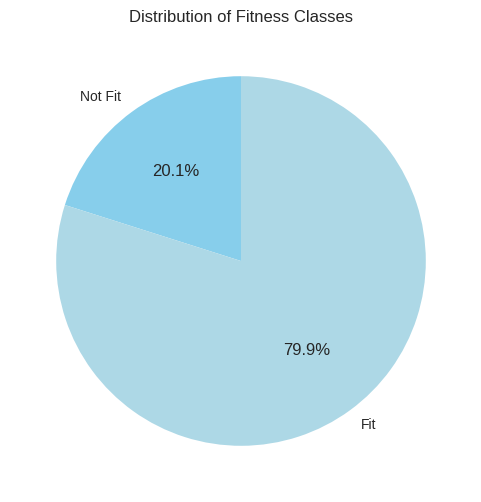

is_fit
0    201
1    799
Name: count, dtype: int64


is_fit
1    799
0    201
Name: count, dtype: int64

In [52]:
import matplotlib.pyplot as plt

fit_counts = sample['is_fit'].value_counts().sort_index()  # ensures 0 then 1 order
plt.figure(figsize=(6, 6))
plt.pie(fit_counts, labels=['Not Fit', 'Fit'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightblue'])
plt.title('Distribution of Fitness Classes')
plt.show()
print(fit_counts)
sample['is_fit'].value_counts()


---
**The bar chart illustrates the relationship between gender and fitness classification.**

The bar chart illustrates the relationship between gender and fitness classification. Both males and females show a higher number of “Fit” individuals, though males have a slightly greater count overall. This pattern indicates that fitness levels vary across genders, and minor category adjustments may be required during preprocessing.

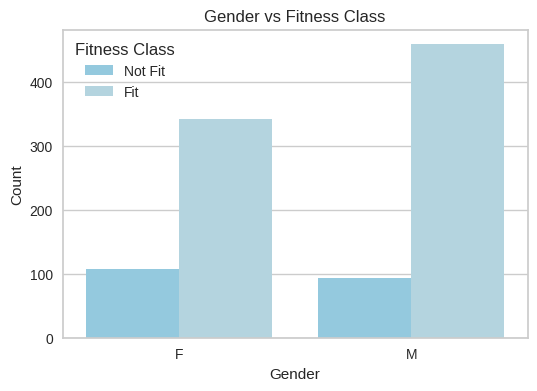

gender  is_fit
F       0         107
        1         341
M       0          94
        1         458
dtype: int64

In [53]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=sample, x='gender', hue='is_fit', palette=['skyblue', 'lightblue'])
plt.title("Gender vs Fitness Class")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Fitness Class", labels=['Not Fit','Fit'])
plt.show()
sample.groupby(['gender', 'is_fit']).size()


---
**The bar chart displays the relationship between smoking status and fitness classification.**

The bar chart compares fitness levels between smokers and non-smokers. Non-smokers are more often classified as “Fit,” while smokers are predominantly “Not Fit.” This suggests a negative association between smoking and fitness, emphasizing the importance of clean and consistent categorical encoding in preprocessing.

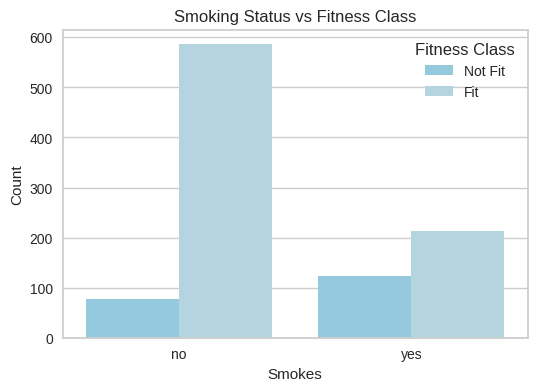

smokes  is_fit
no      0          77
        1         586
yes     0         124
        1         213
dtype: int64

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'smokes' column
sample['smokes'] = sample['smokes'].astype(str).str.strip().str.lower()
sample['smokes'] = sample['smokes'].replace({
    '1': 'yes', '0': 'no', 'true': 'yes', 'false': 'no'
})

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=sample, x='smokes', hue='is_fit',
              order=['no','yes'],
              palette=['skyblue', 'lightblue'])
plt.title("Smoking Status vs Fitness Class")
plt.xlabel("Smokes")
plt.ylabel("Count")
plt.legend(title="Fitness Class", labels=['Not Fit','Fit'])
plt.show()
sample.groupby(['smokes', 'is_fit']).size()


---
**The boxplot compares heart rate distributions between “Fit” and “Not Fit” individuals.**

 “Fit” participants generally show lower heart rates, while “Not Fit” individuals have higher and more variable rates. This indicates potential outliers and highlights the need for preprocessing steps like **outlier handling** and **scaling** to prepare the data for modeling.

<Figure size 600x400 with 0 Axes>

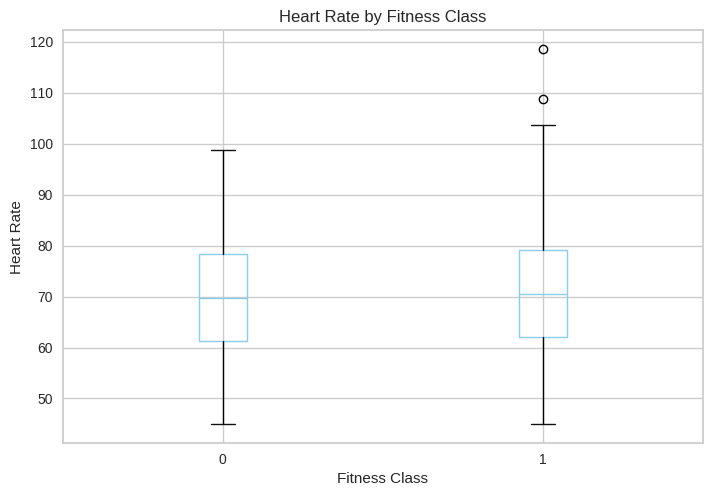

count       mean        std   min    25%   50%    75%    max
is_fit                                                              
0       201.0  69.545771  12.005644  45.0  61.30  69.7  78.40   98.8
1       799.0  70.764330  11.809458  45.0  62.05  70.6  79.05  118.6

In [55]:
import matplotlib.pyplot as plt

# Boxplot for Heart Rate by Fitness Class
plt.figure(figsize=(6,4))
sample.boxplot(column='heart_rate', by='is_fit',
               boxprops=dict(color='skyblue'),
               medianprops=dict(color='skyblue'))
plt.title('Heart Rate by Fitness Class')
plt.suptitle("")  # removes the default automatic title
plt.xlabel('Fitness Class')
plt.ylabel('Heart Rate')
plt.show()

# Statistical summary by fitness category
sample.groupby('is_fit')['heart_rate'].describe()


---
**The histogram illustrates how age varies across fitness classes.**

 Both groups are more concentrated in the younger age range, but “Not Fit” individuals appear more frequently overall. This distribution shows the influence of age on fitness levels, with basic normalization or scaling potentially useful in preprocessing.

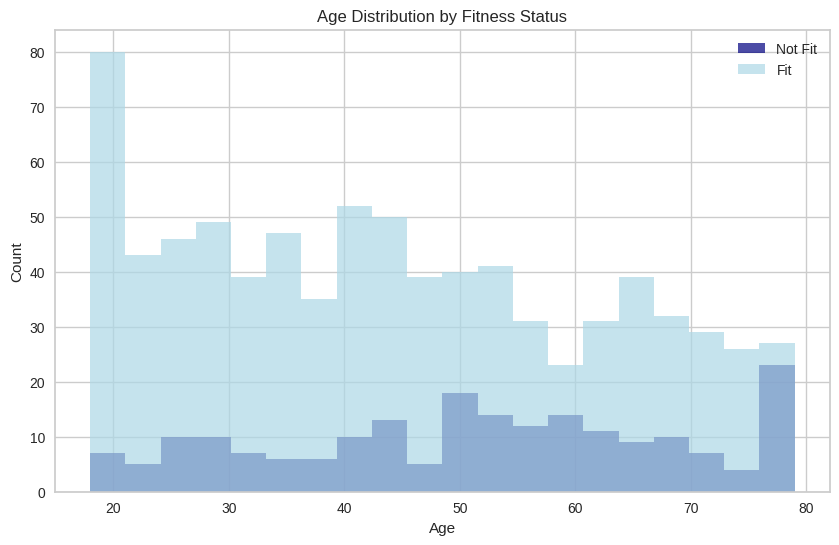

count       mean        std   min   25%   50%   75%   max
is_fit                                                           
0       201.0  51.522388  16.985604  18.0  39.0  53.0  64.0  79.0
1       799.0  44.411765  17.409182  18.0  29.0  43.0  58.0  79.0

In [56]:
plt.figure(figsize=(10,6))
sample[sample['is_fit'] == 0]['age'].hist(bins=20, color='navy',
                                          alpha=0.7, label='Not Fit')
sample[sample['is_fit'] == 1]['age'].hist(bins=20, color='lightblue',
                                          alpha=0.7, label='Fit')
plt.title('Age Distribution by Fitness Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

sample.groupby('is_fit')['age'].describe()


## **Pre-Processing:**
---
####**Data Cleaning: Outlier Detection and Removal**

The Z-score method was used to detect and remove outliers from numeric attributes such as weight_kg, heart_rate, blood_pressure, sleep_hours, and activity_index. Records with Z-scores above ±2 were identified as extreme values and removed based on their deviation from the mean. This technique was applied to reduce skewness, eliminate anomalies, and improve data consistency, ensuring a balanced and reliable dataset (992 rows) for further preprocessing and model training.



In [57]:
from scipy.stats import zscore

sample_preprocessed = sample.copy()

numeric_data = sample_preprocessed.select_dtypes(include=['number'])
specific_columns = numeric_data.drop(columns=['is_fit'])

z_scores = pd.DataFrame(zscore(specific_columns), columns=specific_columns.columns)
threshold = 2

for col in specific_columns.columns:
    outliers = specific_columns[(abs(z_scores[col]) > threshold)]
    print(f"Outliers in '{col}':")
    print(outliers[col].values)
    print()

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)

Outliers in 'age':
[]

Outliers in 'height_cm':
[]

Outliers in 'weight_kg':
[200 250 220 220 220  30 220 220]

Outliers in 'heart_rate':
[ 46.4  45.8  99.6  94.7  46.2 108.7 118.6  46.2 102.3  46.8  46.4  96.1
  96.6  97.2  46.6  98.6  94.8  45.   99.1  98.8  45.   95.9  46.4  46.3
  95.3  45.   46.3  94.7  45.   94.5 103.3  45.   95.4  45.   45.  103.6
 102.2  45.   46.1  46.2  45.   94.7  46.6  98.8  45.   98.2  96.7  46.8
  45. ]

Outliers in 'blood_pressure':
[ 90.   90.   90.  148.8  90.  154.4 151.9  90.   90.2 154.5  90.   90.
 171.2  90.  151.6  90.  155.7  90.  157.9  90.   90.  162.7 150.8  90.4
  90.  154.1  90.4  90.5 149.7 159.1 151.5 155.5  90.  164.6 157.9 150.4
  90.   90.  152.7  90.   90.   90.   90.   90.   90.2 151.4  90.   90.
 150.3 156.6 156.2 149.7 148.5 149.5]

Outliers in 'sleep_hours':
[]

Outliers in 'nutrition_quality':
[]

Outliers in 'activity_index':
[1.14 1.14 1.11 1.14 1.06 1.05 1.14 1.01 1.07 1.07 1.01 1.14 1.04 1.07
 1.13 1.07 1.12 1.01 1.05 1.03 1.

In [58]:
numeric_data = sample_preprocessed.select_dtypes(include=['number'])
numeric_data = numeric_data.drop(columns=['is_fit'])

for col in numeric_data.columns:
    mean_value = numeric_data[col].mean()
    differences_from_mean = abs(numeric_data[col] - mean_value)
    max_difference_index = differences_from_mean.idxmax()
    sample_preprocessed = sample_preprocessed.drop(max_difference_index)
    sample_preprocessed = sample_preprocessed.reset_index(drop=True)

print("\nDataFrame after removing outliers from each column:")
print(sample_preprocessed)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)




DataFrame after removing outliers from each column:
     age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0     56        152         65        69.6           117.0          NaN   
1     69        186         95        60.8           114.8          7.5   
2     32        189         83        60.2           130.1          7.0   
3     60        175         99        58.1           115.8          8.0   
4     38        188         57        81.2           110.6          6.6   
..   ...        ...        ...         ...             ...          ...   
987   36        193        101        88.1           132.9          6.1   
988   79        160         57        55.4           102.4          6.1   
989   42        158        117        74.7           135.2          9.2   
990   76        162         63        82.4           102.0          8.0   
991   51        171         96        79.6           104.3          5.8   

     nutrition_quality  activity_index smokes 

###**Handling Missing Values: Detection**
---
The dataset was checked for missing or incomplete records using the isna() function to ensure data completeness. The analysis showed that only the sleep_hours attribute had 79 missing values. Identifying these gaps early helped ensure that the dataset was properly cleaned and ready for accurate preprocessing and analysis.



In [59]:
rows_with_missing = sample[sample.isna().any(axis=1)]
print("Missing values in each column:")
print(missing_counts)
print("\nRows with missing values:")
display(rows_with_missing)


Missing values in each column:
age                   0
height_cm             0
weight_kg             0
heart_rate            0
blood_pressure        0
sleep_hours          79
nutrition_quality     0
activity_index        0
smokes                0
gender                0
is_fit                0
dtype: int64

Rows with missing values:


age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0     56        152         65        69.6           117.0          NaN   
8     41        162         45        59.4           112.5          NaN   
16    61        198         77        46.4           126.9          NaN   
22    61        162         72        80.2           113.9          NaN   
27    67        194         74        68.5           108.8          NaN   
..   ...        ...        ...         ...             ...          ...   
959   79        153         74        96.7           130.9          NaN   
960   51        177        109        81.1            97.1          NaN   
961   59        163         94        72.6           156.2          NaN   
981   37        161         78        70.4           103.8          NaN   
987   67        182        107        74.1           122.5          NaN   

     nutrition_quality  activity_index smokes gender  is_fit  
0                 2.37            3.97     no      F       1  
8                 2.47            4.62     no      M       1  
16                5.47            4.89     no      F       1  
22                8.56            4.47     no      M       1  
27                2.74            3.42     no      F       1  
..                 ...             ...    ...    ...     ...  
959               6.32            2.62     no      M       0  
960               7.17            4.78    yes      F       0  
961               7.38            2.98    yes      M       0  
981               3.98            2.42    yes      M       0  
987               2.01            3.05     no      M       0  

[79 rows x 11 columns]



###**Handling Missing Values: Imputation**
---
To handle the missing entries in the **sleep_hours** column, the mean imputation method was applied. The missing values were replaced with the column’s mean to maintain the overall data distribution and avoid introducing bias. This approach preserved the dataset’s consistency and ensured that all 11 attributes remained complete for accurate analysis and modeling.



In [60]:
mean_value = sample_preprocessed['sleep_hours'].mean()

sample_preprocessed['sleep_hours'] = sample_preprocessed['sleep_hours'].fillna(value=mean_value)

missing_values = sample_preprocessed.isnull().sum()
print('Missing values per column:')
print(missing_values)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)



Missing values per column:
age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64


###**Class Distribution after Data Cleaning:**
---

1.   List item
2.   List item


The pie chart illustrates the class distribution of the dataset after cleaning, with 79.7% of the participants classified as Fit, and the remaining 20.3% classified as Not Fit.

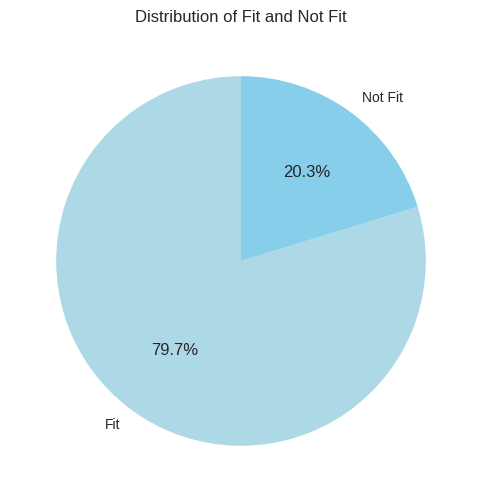

is_fit
1    791
0    201
Name: count, dtype: int64


In [61]:
isfit_counts = sample_preprocessed['is_fit'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(isfit_counts, labels=['Fit', 'Not Fit'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'skyblue'])
plt.title('Distribution of Fit and Not Fit')
plt.show()
print(isfit_counts)



###**Data Transformation: BMI Aggregation**
---
The attributes **height_cm** and **weight_kg** were aggregated to create **BMI** using the formula **weight_kg / (height_m²)** after converting height to meters. This was applied to simplify the dataset, reduce feature count, and provide a clearer, single health indicator strongly related to **is_fit**, improving interpretability and analysis efficiency.


In [62]:
sample_preprocessed["height_m"] = sample_preprocessed["height_cm"] / 100

sample_preprocessed["BMI"] = sample_preprocessed["weight_kg"] / (sample_preprocessed["height_m"] ** 2)

sample_preprocessed["BMI"] = sample_preprocessed["BMI"].round(2)

sample_preprocessed.drop(columns=["height_m"], inplace=True)

print ("Updated Data with BMI Column:")

display(sample_preprocessed[["height_cm", "weight_kg", "BMI"]])

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)

Updated Data with BMI Column:


height_cm  weight_kg    BMI
0          152         65  28.13
1          186         95  27.46
2          189         83  23.24
3          175         99  32.33
4          188         57  16.13
..         ...        ...    ...
987        193        101  27.11
988        160         57  22.27
989        158        117  46.87
990        162         63  24.01
991        171         96  32.83

[992 rows x 3 columns]

###**Data Normalization: Feature Scaling**
---
In this step, **Min-Max normalization** was applied to numerical attributes, including **height_cm, weight_kg, heart_rate, blood_pressure, sleep_hours, activity_index, nutrition_quality,** and **BMI**. This technique rescales values to a **0–1 range** to ensure consistency across features, reduce the influence of large-scale variables, and improve model performance. It was applied to enhance comparability and maintain balance among features during analysis and machine learning.


In [63]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['height_cm', 'weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours', 'activity_index', 'nutrition_quality', 'BMI']

scaler = MinMaxScaler()
sample_preprocessed[columns_to_normalize] = scaler.fit_transform(sample_preprocessed[columns_to_normalize])

sample_preprocessed[columns_to_normalize] = sample_preprocessed[columns_to_normalize].round(8)

print("Normalized Data:")
display(sample_preprocessed[columns_to_normalize])

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)


Normalized Data:


height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0     0.040816   0.159091    0.334239        0.332512     0.453501   
1     0.734694   0.295455    0.214674        0.305419     0.437500   
2     0.795918   0.240909    0.206522        0.493842     0.375000   
3     0.510204   0.313636    0.177989        0.317734     0.500000   
4     0.775510   0.122727    0.491848        0.253695     0.325000   
..         ...        ...         ...             ...          ...   
987   0.877551   0.322727    0.585598        0.528325     0.262500   
988   0.204082   0.122727    0.141304        0.152709     0.262500   
989   0.163265   0.395455    0.403533        0.556650     0.650000   
990   0.244898   0.150000    0.508152        0.147783     0.500000   
991   0.428571   0.300000    0.470109        0.176108     0.225000   

     activity_index  nutrition_quality       BMI  
0          0.743719           0.231621  0.186852  
1          0.547739           0.876133  0.180168  
2          0.670854           0.615307  0.138069  
3          0.959799           0.994965  0.228751  
4          0.992462           0.845921  0.067139  
..              ...                ...       ...  
987        0.354271           0.301108  0.176676  
988        0.045226           0.628399  0.128392  
989        0.030151           0.942598  0.373803  
990        0.211055           0.507553  0.145750  
991        0.231156           0.010070  0.233739  

[992 rows x 8 columns]

###**Age Discretization**
---
**The age attribute was discretized into three categories using equal-width binning to represent different life stages: Youth, Adult, and Senior.**
Each bin was assigned a numeric code to represent its group:

0 = Youth: Ages 0 to 24

1 = Adult: Ages 25 to 59

2 = Senior: Ages 60 and above

This technique was applied to simplify analysis and reduce variability by converting continuous age values into grouped ranges, improving interpretability and aiding pattern detection in relation to the target feature is_fit.

In [64]:

column_to_discretize = 'age'
num_bins = 3

sample_preprocessed['discretized_' + column_to_discretize] = pd.cut(
    sample_preprocessed[column_to_discretize],
    bins=num_bins,
    labels=False
)

print("Original DataFrame with discretized column:")
print(sample_preprocessed[[column_to_discretize, 'discretized_' + column_to_discretize]])

sample_preprocessed.drop(columns=[column_to_discretize], inplace=True)

sample_preprocessed.to_csv('Preprocessed_dataset.csv', index=False)



Original DataFrame with discretized column:
     age  discretized_age
0     56                1
1     69                2
2     32                0
3     60                2
4     38                0
..   ...              ...
987   36                0
988   79                2
989   42                1
990   76                2
991   51                1

[992 rows x 2 columns]


###**Feature Selection: Correlation-Based Filtering**
---
In this step, the correlation between each feature and the target variable is_fit was calculated to identify the most influential predictors. The top five features: activity_index, nutrition_quality, discretized_age, sleep_hours, and BMI, were selected based on their highest absolute correlation values. This method enhances model efficiency and interpretability by retaining only the most relevant attributes while minimizing redundancy.

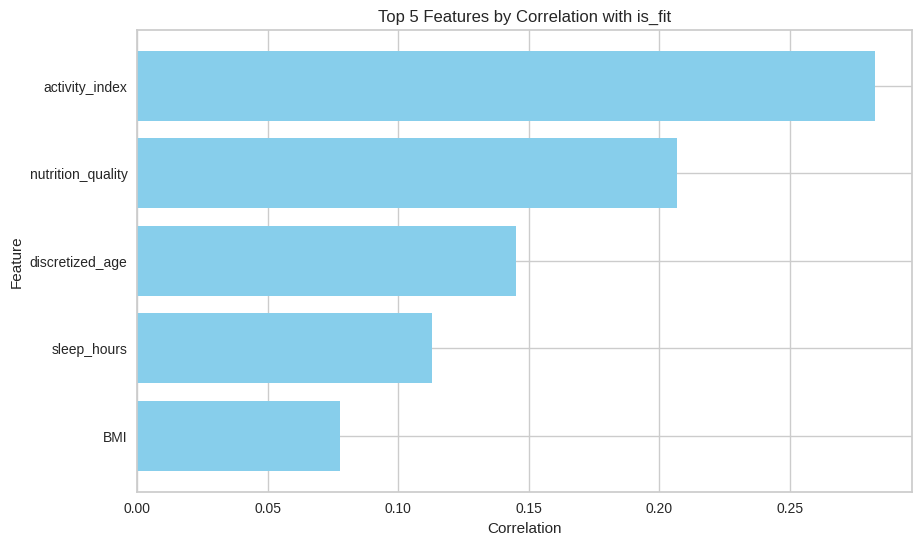

In [65]:
warnings.filterwarnings("ignore")

featureSelection = sample_preprocessed.copy()

X = featureSelection.drop('is_fit', axis=1)
y = featureSelection['is_fit']

X = X.apply(pd.to_numeric, errors='coerce')
X_temp = X.fillna(X.mean())

correlations = X_temp.corrwith(y).abs()

correlation_scores = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

top_5_features = correlation_scores.nlargest(5, 'Correlation')['Feature'].tolist()

plt.figure(figsize=(10, 6))
plt.barh(top_5_features, correlation_scores.set_index('Feature').loc[top_5_features]['Correlation'], color='skyblue')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Top 5 Features by Correlation with is_fit')
plt.gca().invert_yaxis()
plt.show()

featureSelection = featureSelection[top_5_features + ['is_fit']]
featureSelection.to_csv('Preprocessed_dataset.csv', index=False)


###**Preprocessing Results Summary**
---

After applying the preprocessing techniques, the dataset became cleaner, more consistent, and ready for analysis. Missing values in the sleep_hours attribute were filled using the mean imputation method, ensuring no data loss while maintaining realistic averages. Outlier detection and removal eliminated extreme values in attributes like weight_kg and heart_rate, improving data reliability. BMI was calculated from height_cm and weight_kg, adding a valuable health indicator. The age attribute was discretized into three categories (Youth, Adult, Senior) to simplify interpretation and highlight demographic patterns. Normalization (Min-Max Scaling) was then applied to numerical attributes such as height_cm, heart_rate, activity_index, and BMI, ensuring all features were on the same scale for fair model comparison. Finally, feature selection using correlation analysis identified the most relevant predictors (activity_index, nutrition_quality, discretized_age, sleep_hours, and BMI), reducing redundancy and focusing on impactful variables.
#####**Overall, these steps improved data quality, interpretability, and model readiness.**

###**Snapshot of Raw dataset VS. Prcessed dataset**
---

In [66]:


sample_cols = [
    "age","height_cm","weight_kg","heart_rate","blood_pressure",
    "sleep_hours","nutrition_quality","activity_index","smokes","gender","is_fit"
]

sample_preprocessed_cols = [
    "discretized_age","height_cm","weight_kg","heart_rate","blood_pressure",
    "sleep_hours","nutrition_quality","activity_index","BMI","is_fit"
]


print("RAW shape:", sample.shape)
print("PREPROCESSED shape:", sample_preprocessed.shape)


print("\n=== SNAPSHOT • RAW DATASET (first 5 rows) ===")
display(sample[sample_cols].head(5))

print("\n=== SNAPSHOT • PREPROCESSED DATASET (first 5 rows) ===")
display(sample_preprocessed[sample_preprocessed_cols].head(5))


RAW shape: (1000, 11)
PREPROCESSED shape: (992, 12)

=== SNAPSHOT • RAW DATASET (first 5 rows) ===


age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
0   56        152         65        69.6           117.0          NaN   
1   69        186         95        60.8           114.8          7.5   
2   32        189         83        60.2           130.1          7.0   
3   60        175         99        58.1           115.8          8.0   
4   38        188         57        81.2           110.6          6.6   

   nutrition_quality  activity_index smokes gender  is_fit  
0               2.37            3.97     no      F       1  
1               8.77            3.19     no      F       1  
2               6.18            3.68     no      M       1  
3               9.95            4.83    yes      F       1  
4               8.47            4.96     no      M       1


=== SNAPSHOT • PREPROCESSED DATASET (first 5 rows) ===


discretized_age  height_cm  weight_kg  heart_rate  blood_pressure  \
0                1   0.040816   0.159091    0.334239        0.332512   
1                2   0.734694   0.295455    0.214674        0.305419   
2                0   0.795918   0.240909    0.206522        0.493842   
3                2   0.510204   0.313636    0.177989        0.317734   
4                0   0.775510   0.122727    0.491848        0.253695   

   sleep_hours  nutrition_quality  activity_index       BMI  is_fit  
0     0.453501           0.231621        0.743719  0.186852       1  
1     0.437500           0.876133        0.547739  0.180168       1  
2     0.375000           0.615307        0.670854  0.138069       1  
3     0.500000           0.994965        0.959799  0.228751       1  
4     0.325000           0.845921        0.992462  0.067139       1

# **IT326 Project - Phase3**
---

In this phase, we’ll use data mining techniques: classification and clustering to analyze our dataset. Classification will categorize data into predefined labels, allowing us to predict classes for new instances, while clustering will group similar data points based on shared characteristics.

### **Importing Required Libraries:**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics import calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

### **Loading Data**

In [68]:
data = pd.read_csv('Preprocessed_dataset.csv')
counts = data['is_fit'].value_counts()
# Print the counts for 0 and 1
print("Number of 0s in 'is fit':", counts.get(0, 0))
print("Number of 1s in 'is fit':", counts.get(1, 0))
# Display the first few rows of the data
display(data.head())

Number of 0s in 'is fit': 201
Number of 1s in 'is fit': 791


activity_index  nutrition_quality  discretized_age  sleep_hours       BMI  \
0        0.743719           0.231621                1     0.453501  0.186852   
1        0.547739           0.876133                2     0.437500  0.180168   
2        0.670854           0.615307                0     0.375000  0.138069   
3        0.959799           0.994965                2     0.500000  0.228751   
4        0.992462           0.845921                0     0.325000  0.067139   

   is_fit  
0       1  
1       1  
2       1  
3       1  
4       1

## **Classification**
---

We will perform a comprehensive evaluation of Decision Tree classification on our dataset, using three distinct training-test partition sizes. This approach ensures a robust assessment of the model's reliability and generalizability, supporting confident decision-making for model selection.

### **Feature Selection**

We used feature selection to focus on the most relevant attributes for predicting the **"is fit"** status. This process helps reduce noise and improves the model’s accuracy and efficiency by identifying the features that contribute the most to determining whether an individual is classified as fit or not.


In [69]:
fn = data.keys().tolist()[:-1]
X = data[fn]
y = data['is_fit']

### **Splitting the Dataset**

Splitting data into three different test sizes:

**90-10:**
  - Training (90%)

  - Test (10%)
  
**80-20:**
  - Training (80%)

  - Test (20%)

**70-30:**
  - Training (70%)

  - Test (30%)

In [70]:
# 90% training and 10% testing
X_train_90, X_test_10, Y_train_90, Y_test_10 = train_test_split(
    X, y, test_size=0.10, random_state=1)

# 80% training and 20% testing
X_train_80, X_test_20, Y_train_80, Y_test_20 = train_test_split(
    X, y, test_size=0.20, random_state=1)

# 70% training and 30% testing
X_train_70, X_test_30, Y_train_70, Y_test_30 = train_test_split(
    X, y, test_size=0.30, random_state=1)

### **Building Decision Tree Model**

For each partition, we will test two attribute selection measures: Information Gain (using entropy) and the Gini index.

The Gini index, ranging from 0 to 1, measures impurity, where 0 indicates perfect purity (all instances belong to one class), and 1 represents maximum impurity (equal class distribution). Decision Trees choose the attribute that produces the lowest Gini value after the split.

To manage complexity, we apply pruning by limiting the maximum depth of the tree. This helps reduce unnecessary branching, simplifies the final decision path, and improves interpretability without severely harming model performance.

### **Information Gain (Entropy)**
---

Entropy is used in constructing decision tree models to determine the best splits for our data. It measures the impurity of a feature with respect to the target attribute "is_fit", guiding the model to select splits that provide the most information gain.

By using entropy, the model becomes more efficient at identifying the features that best separate individuals who are fit from those who are not fit.

In [71]:
# 90-10
clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy_90.fit(X_train_90, Y_train_90)

# 80-20
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy_80.fit(X_train_80, Y_train_80)

# 70-30
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_entropy_70.fit(X_train_70, Y_train_70)

# Predictions
y_pred_entropy_90 = clf_entropy_90.predict(X_test_10)
y_pred_entropy_80 = clf_entropy_80.predict(X_test_20)
y_pred_entropy_70 = clf_entropy_70.predict(X_test_30)

### **Evaluating The Model:**

#### **Analysis of Results:**
---
#### **90-10 Split:**

- **Accuracy:** 67%
- **Sensitivity:** 79%
- **Specificity:** 23%
- **Precision:** 78%
- **Error Rate:** 33%

This split shows high sensitivity and precision, indicating that the model performs well in detecting positive cases. However, the low specificity suggests that the model struggles to correctly identify negative cases. While the overall accuracy is moderate, the imbalance between sensitivity and specificity makes this split less consistent.

---

#### **80-20 Split:**

- **Accuracy:** 69%
- **Sensitivity:** 85%
- **Specificity:** 9%
- **Precision:** 77%
- **Error Rate:** 31%

The model achieves a better accuracy in this split compared to 90–10. Sensitivity remains strong, meaning positive cases are identified well. However, specificity drops significantly to only 9%, showing the model is highly biased toward predicting the positive class. This imbalance affects the reliability of the split despite the high recall.

---

#### **70-30 Split:**

- **Accuracy:** 70%
- **Sensitivity:** 86%
- **Specificity:** 16%
- **Precision:** 78%
- **Error Rate:** 30%

This split provides the best overall performance, achieving the highest accuracy and the strongest sensitivity among all splits. Although specificity is still low, it is higher than the other splits. The combination of accuracy, sensitivity, and precision makes this split the most balanced and effective under the current conditions.

---

#### **Conclusion:**

The **70-30 split** delivers the strongest results, achieving the highest accuracy with better overall balance compared to the other splits. While the model performs well in detecting positive cases (high sensitivity), its ability to identify negatives remains limited due to low specificity. Further improvements such as feature engineering, class balancing, and trying different algorithms may help enhance overall performance.

---

### **Entropy Accuracy Table**

| Criterion | 90% training / 10% testing | 80% training / 20% testing | 70% training / 30% testing |
|----------|-----------------------------|-----------------------------|-----------------------------|
| **Entropy (IG)** | **67%** | **69%** | **70%** |


In [72]:
# Function to calculate specificity
def calculate_specificity(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    specificity = tn / (tn + fp)
    return specificity

# Calculate and print metrics for each split
# 90-10 split
cm_entropy_90 = confusion_matrix(Y_test_10, y_pred_entropy_90)
accuracy_entropy_90 = accuracy_score(Y_test_10, y_pred_entropy_90)
precision_entropy_90 = precision_score(Y_test_10, y_pred_entropy_90, average='binary')
recall_entropy_90 = recall_score(Y_test_10, y_pred_entropy_90, average='binary')
specificity_entropy_90 = calculate_specificity(cm_entropy_90)
error_rate_entropy_90 = 1 - accuracy_entropy_90

print("Metrics for 90-10 Split:")
print(f"Accuracy (Entropy - 90-10): {accuracy_entropy_90:.2f}")
print(f"Sensitivity (Recall - 90-10): {recall_entropy_90:.2f}")
print(f"Specificity (Entropy - 90-10): {specificity_entropy_90:.2f}")
print(f"Precision (Entropy - 90-10): {precision_entropy_90:.2f}")
print(f"Error Rate (Entropy - 90-10): {error_rate_entropy_90:.2f}\n")

# 80-20 split
cm_entropy_80 = confusion_matrix(Y_test_20, y_pred_entropy_80)
accuracy_entropy_80 = accuracy_score(Y_test_20, y_pred_entropy_80)
precision_entropy_80 = precision_score(Y_test_20, y_pred_entropy_80, average='binary')
recall_entropy_80 = recall_score(Y_test_20, y_pred_entropy_80, average='binary')
specificity_entropy_80 = calculate_specificity(cm_entropy_80)
error_rate_entropy_80 = 1 - accuracy_entropy_80

print("Metrics for 80-20 Split:")
print(f"Accuracy (Entropy - 80-20): {accuracy_entropy_80:.2f}")
print(f"Sensitivity (Recall - 80-20): {recall_entropy_80:.2f}")
print(f"Specificity (Entropy - 80-20): {specificity_entropy_80:.2f}")
print(f"Precision (Entropy - 80-20): {precision_entropy_80:.2f}")
print(f"Error Rate (Entropy - 80-20): {error_rate_entropy_80:.2f}\n")

# 70-30 split
cm_entropy_70 = confusion_matrix(Y_test_30, y_pred_entropy_70)
accuracy_entropy_70 = accuracy_score(Y_test_30, y_pred_entropy_70)
precision_entropy_70 = precision_score(Y_test_30, y_pred_entropy_70, average='binary')
recall_entropy_70 = recall_score(Y_test_30, y_pred_entropy_70, average='binary')
specificity_entropy_70 = calculate_specificity(cm_entropy_70)
error_rate_entropy_70 = 1 - accuracy_entropy_70

print("Metrics for 70-30 Split:")
print(f"Accuracy (Entropy - 70-30): {accuracy_entropy_70:.2f}")
print(f"Sensitivity (Recall - 70-30): {recall_entropy_70:.2f}")
print(f"Specificity (Entropy - 70-30): {specificity_entropy_70:.2f}")
print(f"Precision (Entropy - 70-30): {precision_entropy_70:.2f}")
print(f"Error Rate (Entropy - 70-30): {error_rate_entropy_70:.2f}\n")

Metrics for 90-10 Split:
Accuracy (Entropy - 90-10): 0.67
Sensitivity (Recall - 90-10): 0.79
Specificity (Entropy - 90-10): 0.23
Precision (Entropy - 90-10): 0.78
Error Rate (Entropy - 90-10): 0.33

Metrics for 80-20 Split:
Accuracy (Entropy - 80-20): 0.69
Sensitivity (Recall - 80-20): 0.85
Specificity (Entropy - 80-20): 0.09
Precision (Entropy - 80-20): 0.77
Error Rate (Entropy - 80-20): 0.31

Metrics for 70-30 Split:
Accuracy (Entropy - 70-30): 0.70
Sensitivity (Recall - 70-30): 0.86
Specificity (Entropy - 70-30): 0.16
Precision (Entropy - 70-30): 0.78
Error Rate (Entropy - 70-30): 0.30



#### **Entropy Confusion Matrix**

**Based on the confusion matrices and evaluation results:**

---
1. **90-10 Split:**

- True Negatives (TN): 5

- False Positives (FP): 17

- False Negatives (FN): 16

- True Positives (TP): 62

- Accuracy: ~67%

This split shows good performance in detecting positive cases, with a high number of true positives. However, the relatively high number of false positives and false negatives indicates that the model still misclassifies both classes, though the overall accuracy

---
2. **80-20 Split:**

- True Negatives (TN): 4

- False Positives (FP): 39

- False Negatives (FN): 23

- True Positives (TP): 133

- Accuracy: ~69%

This split shows more misclassifications among negative cases, as indicated by the high false positive count. Still, the model performs strongly in identifying positive cases, achieving a higher accuracy than the 90–10 split due to the large number of correct positive predictions.

---

3. **70-30 Split:**

- True Negatives (TN): 11

- False Positives (FP): 57

- False Negatives (FN): 32

- True Positives (TP): 198

- Accuracy: ~70%

This split shows the best overall results. Although false positives and false negatives remain noticeable, the model achieves the highest number of correct predictions overall and provides the best balance between the confusion matrix values. This makes the 70–30 split the strongest and most stable configuration.

---

**Conclusion:**

The **70-30 split** provides the most reliable confusion matrix distribution and the highest accuracy among all splits. While misclassifications still occur (particularly false positives) the model shows the strongest predictive performance in this configuration. Applying techniques such as class balancing, feature engineering, or experimenting with different classifiers may help reduce errors and further improve results.

---

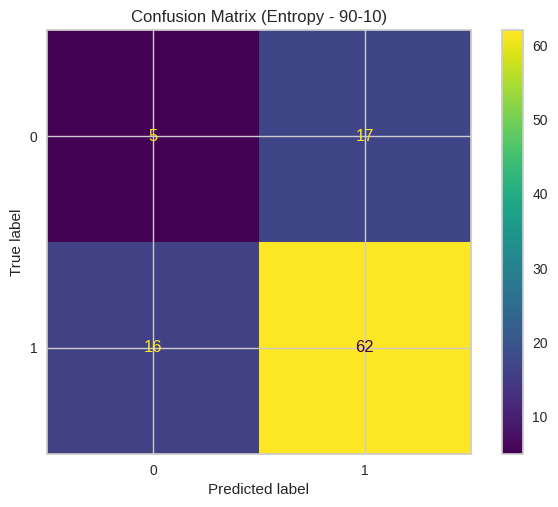

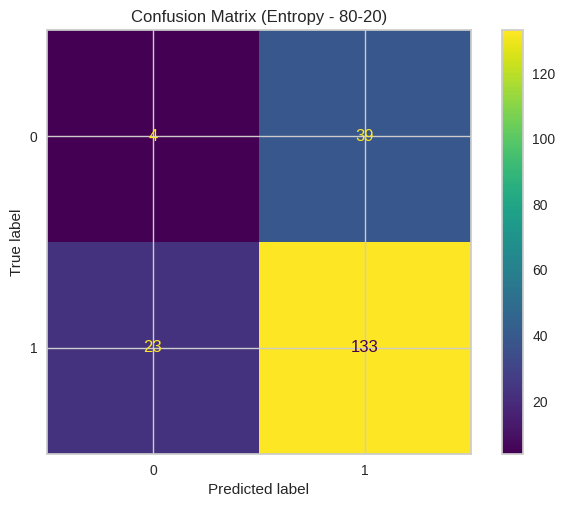

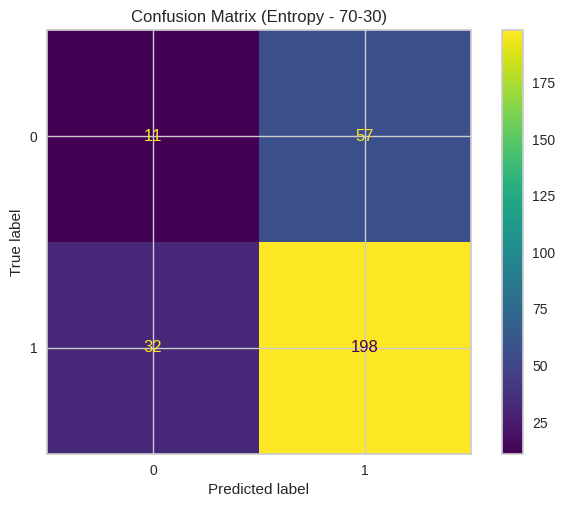

In [73]:
# 90-10
ConfusionMatrixDisplay.from_predictions(Y_test_10, y_pred_entropy_90)
plt.title("Confusion Matrix (Entropy - 90-10)")
plt.show()

# 80-20
ConfusionMatrixDisplay.from_predictions(Y_test_20, y_pred_entropy_80)
plt.title("Confusion Matrix (Entropy - 80-20)")
plt.show()

# 70-30
ConfusionMatrixDisplay.from_predictions(Y_test_30, y_pred_entropy_70)
plt.title("Confusion Matrix (Entropy - 70-30)")
plt.show()

#### **Visualizing and Saving Decision Tree**

The following visualizations show how the decision tree structure varies across the 90-10, 80-20, and 70-30 splits using the Entropy criterion.  
The 70-30 split produces the most balanced and well-structured tree, which aligns with its strong overall performance in earlier metrics.

The trees highlight important features, decision thresholds, and classification paths, helping to illustrate how the model distinguishes between “fit” and “not fit” individuals. This comparison also reveals how the size of the training/testing split affects model complexity and decision boundaries.

---

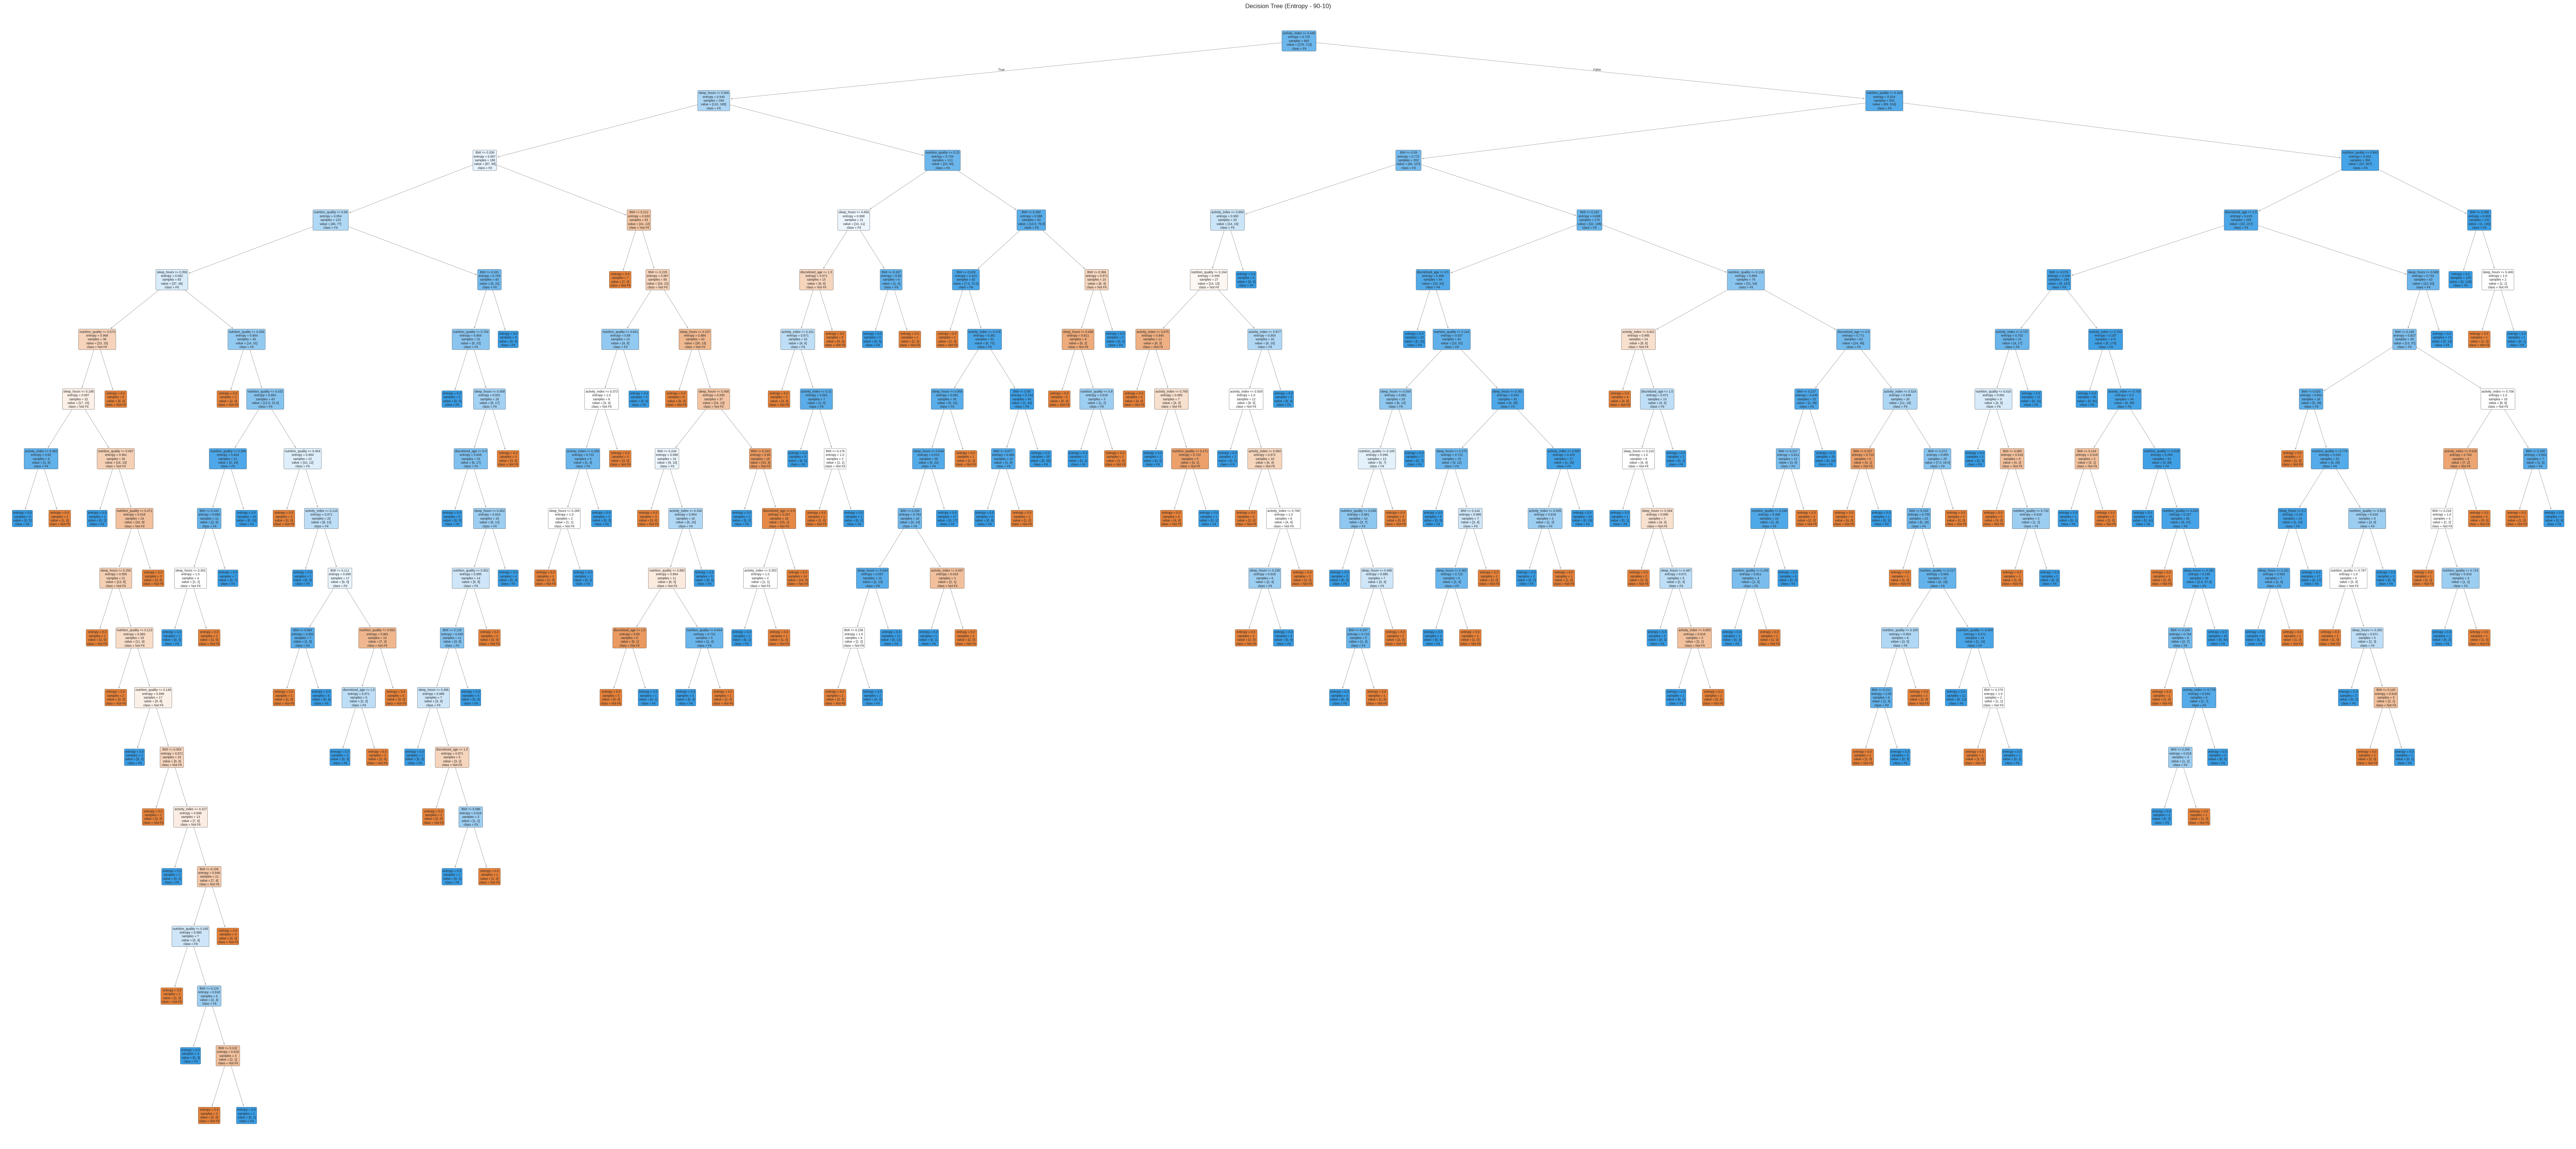

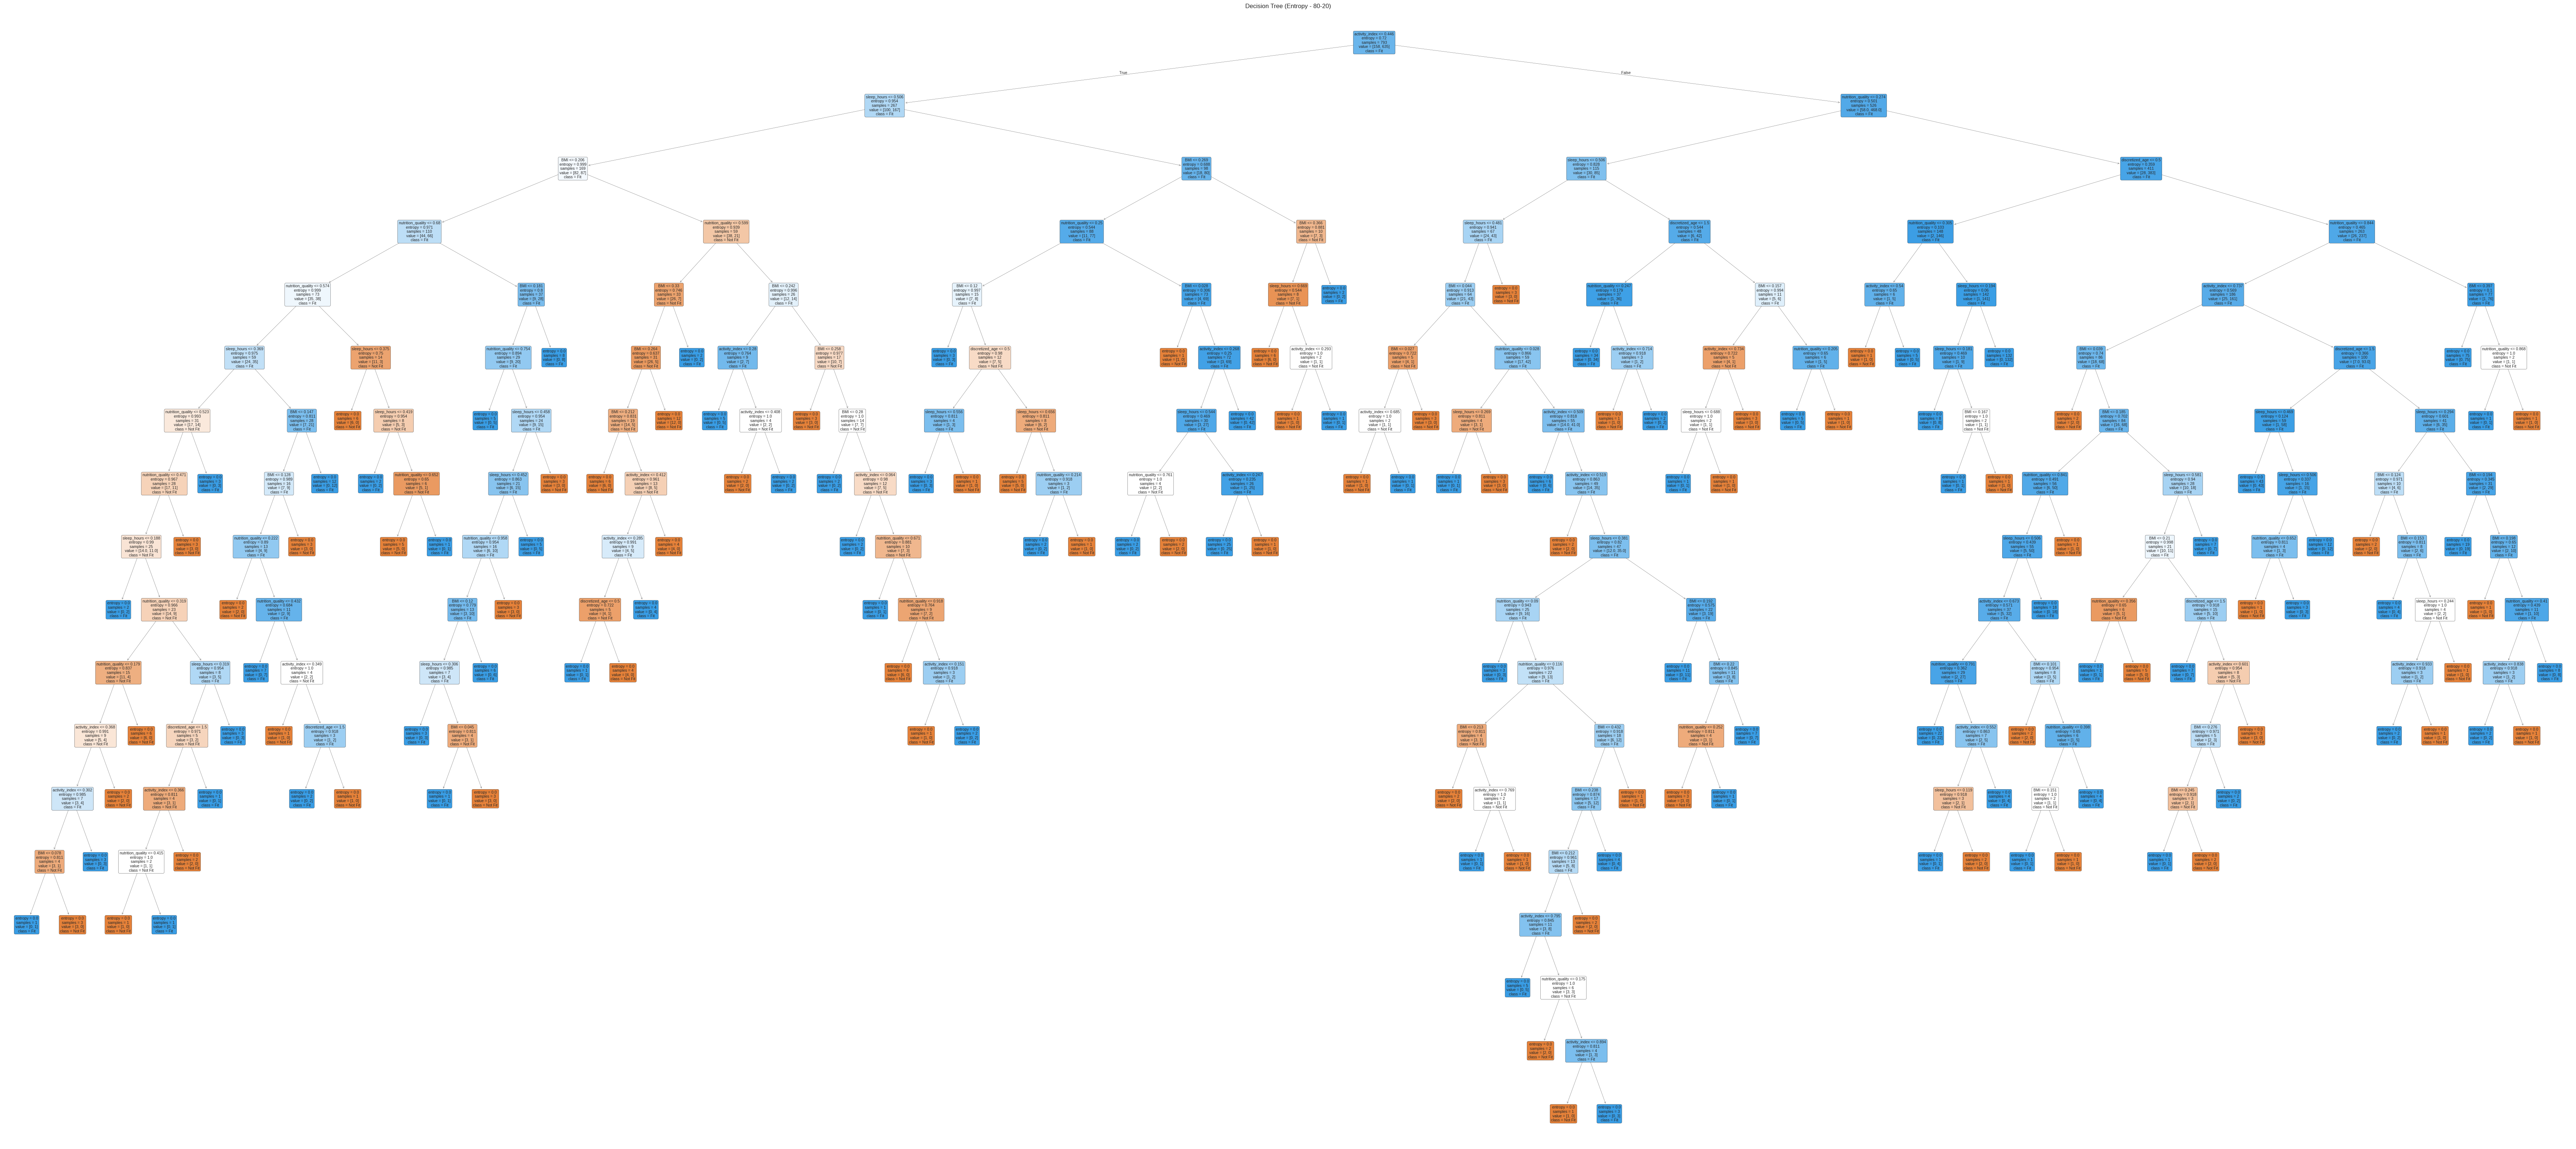

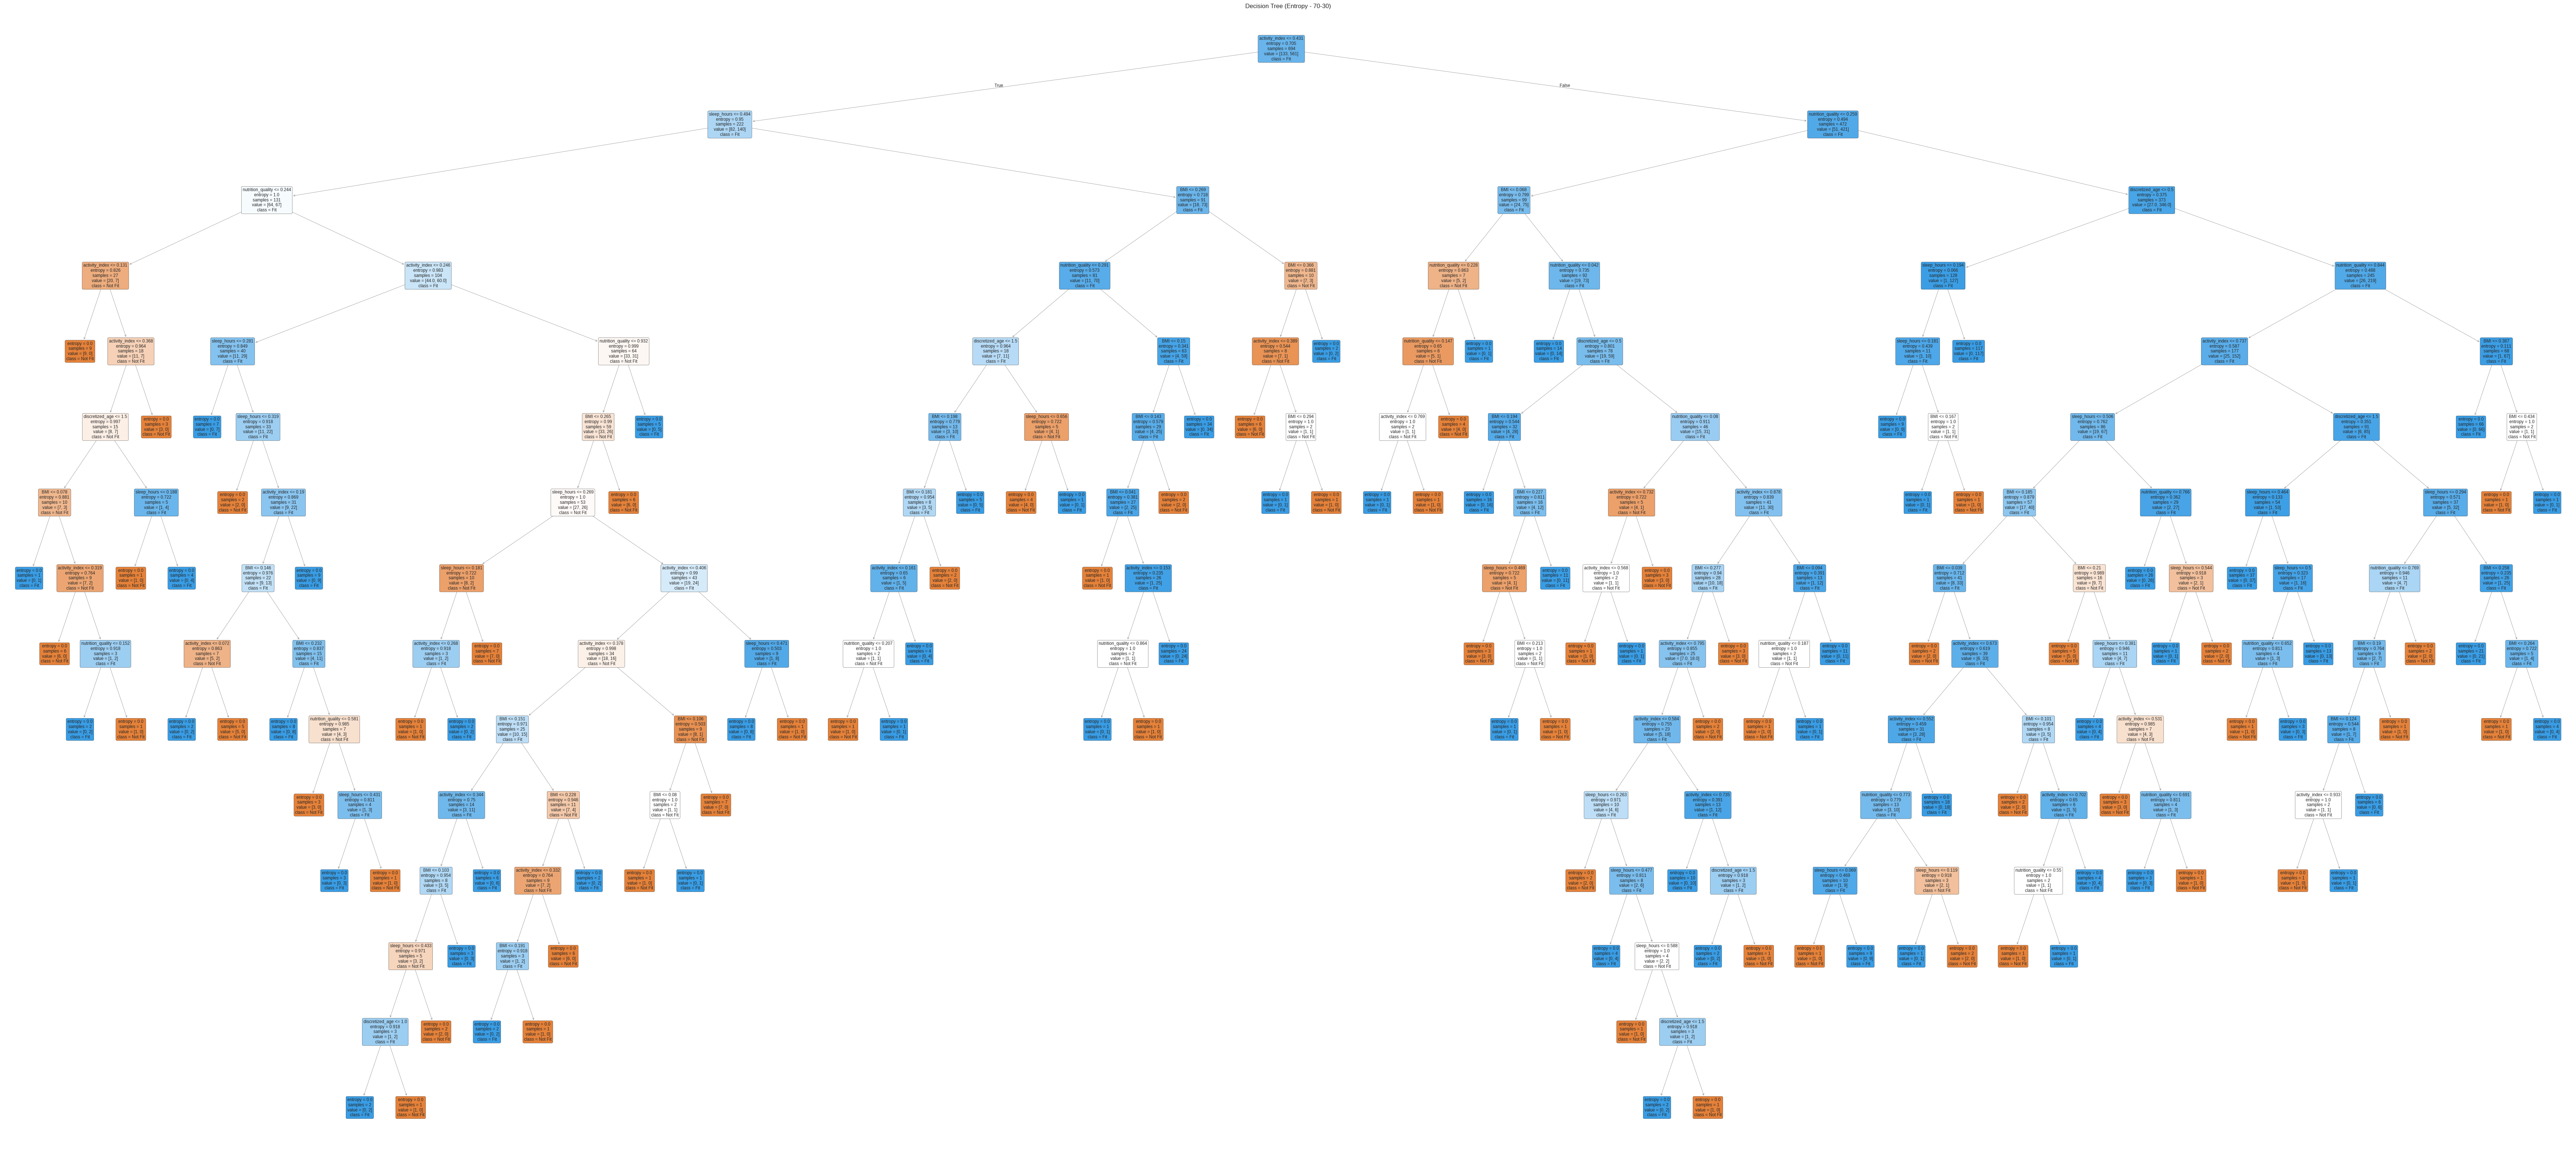

In [74]:
# 90-10 Tree
plt.figure(figsize=(90, 40))
plot_tree(clf_entropy_90, filled=True, feature_names=X.columns,
          class_names=['Not Fit', 'Fit'], rounded=True)
plt.title("Decision Tree (Entropy - 90-10)")
plt.show()

# 80-20 Tree
plt.figure(figsize=(90, 40))
plot_tree(clf_entropy_80, filled=True, feature_names=X.columns,
          class_names=['Not Fit', 'Fit'], rounded=True)
plt.title("Decision Tree (Entropy - 80-20)")
plt.show()

# 70-30 Tree
plt.figure(figsize=(90, 40))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns,
          class_names=['Not Fit', 'Fit'], rounded=True)
plt.title("Decision Tree (Entropy - 70-30)")
plt.show()

## **Gini**
---
The Gini index is used when building decision tree models to decide the best splits for the data. At each step, the Gini index measures the impurity of a feature in relation to the **is_fit** attribute, guiding the model to choose splits that reduce impurity the most. This process helps create a more accurate and efficient tree by focusing on features that best distinguish between **fit** and **not fit** cases in the fitness dataset.

In [75]:
# Gini models for each split

clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_90.fit(X_train_90, Y_train_90)

clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_80.fit(X_train_80, Y_train_80)

clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_70.fit(X_train_70, Y_train_70)

y_pred_gini_90 = clf_gini_90.predict(X_test_10)
y_pred_gini_80 = clf_gini_80.predict(X_test_20)
y_pred_gini_70 = clf_gini_70.predict(X_test_30)

### **Evaluating the model (Gini Index)**

**Analysis of Results:**

---

#### **90–10 Split**
- **Accuracy:** 65%
- **Sensitivity (Recall):** 77%
- **Specificity:** 23%
- **Precision:** 78%
- **Error Rate:** 35%

This split gives a moderate accuracy and good sensitivity, meaning most *fit* individuals are detected. However, the relatively low specificity and higher error rate indicate that a noticeable number of *not-fit* individuals are still incorrectly classified as fit.

---

#### **80–20 Split**
- **Accuracy:** 70%
- **Sensitivity (Recall):** 83%
- **Specificity:** 23%
- **Precision:** 80%
- **Error Rate:** 30%

With more test data, the model becomes more accurate and maintains strong sensitivity and precision. Specificity remains limited, so the model still struggles to correctly recognize not-fit individuals, but overall this split is clearly better than the 90–10 configuration.

---

#### **70–30 Split**
- **Accuracy:** 72%
- **Sensitivity (Recall):** 85%
- **Specificity:** 28%
- **Precision:** 80%
- **Error Rate:** 28%

The 70–30 split achieves the **highest accuracy** among all Gini configurations and also provides the **best trade-off** between sensitivity and specificity.

---

#### **Conclusion (Gini)**
The **70–30 split** is the strongest configuration for the Gini index.



### **Gini Accuracy Table**

| Criterion | 90% training / 10% testing | 80% training / 20% testing | 70% training / 30% testing |
|----------|-----------------------------|-----------------------------|-----------------------------|
| **Gini** | **65%** | **70%** | **72%** |


In [76]:

# Function to calculate and print metrics for each Gini split

# 90–10
cm_gini_90 = confusion_matrix(Y_test_10, y_pred_gini_90)
accuracy_gini_90 = accuracy_score(Y_test_10, y_pred_gini_90)
precision_gini_90 = precision_score(Y_test_10, y_pred_gini_90)
recall_gini_90 = recall_score(Y_test_10, y_pred_gini_90)
specificity_gini_90 = calculate_specificity(cm_gini_90)
error_rate_gini_90 = 1 - accuracy_gini_90

print("Metrics for 90–10 Split:")
print(f"Accuracy: {accuracy_gini_90:.2f}")
print(f"Sensitivity: {recall_gini_90:.2f}")
print(f"Specificity: {specificity_gini_90:.2f}")
print(f"Precision: {precision_gini_90:.2f}")
print(f"Error Rate: {error_rate_gini_90:.2f}\n")

# 80–20
cm_gini_80 = confusion_matrix(Y_test_20, y_pred_gini_80)
accuracy_gini_80 = accuracy_score(Y_test_20, y_pred_gini_80)
precision_gini_80 = precision_score(Y_test_20, y_pred_gini_80)
recall_gini_80 = recall_score(Y_test_20, y_pred_gini_80)
specificity_gini_80 = calculate_specificity(cm_gini_80)
error_rate_gini_80 = 1 - accuracy_gini_80

print("Metrics for 80–20 Split:")
print(f"Accuracy: {accuracy_gini_80:.2f}")
print(f"Sensitivity: {recall_gini_80:.2f}")
print(f"Specificity: {specificity_gini_80:.2f}")
print(f"Precision: {precision_gini_80:.2f}")
print(f"Error Rate: {error_rate_gini_80:.2f}\n")

# 70–30
cm_gini_70 = confusion_matrix(Y_test_30, y_pred_gini_70)
accuracy_gini_70 = accuracy_score(Y_test_30, y_pred_gini_70)
precision_gini_70 = precision_score(Y_test_30, y_pred_gini_70)
recall_gini_70 = recall_score(Y_test_30, y_pred_gini_70)
specificity_gini_70 = calculate_specificity(cm_gini_70)
error_rate_gini_70 = 1 - accuracy_gini_70

print("Metrics for 70–30 Split:")
print(f"Accuracy: {accuracy_gini_70:.2f}")
print(f"Sensitivity: {recall_gini_70:.2f}")
print(f"Specificity: {specificity_gini_70:.2f}")
print(f"Precision: {precision_gini_70:.2f}")
print(f"Error Rate: {error_rate_gini_70:.2f}")


Metrics for 90–10 Split:
Accuracy: 0.65
Sensitivity: 0.77
Specificity: 0.23
Precision: 0.78
Error Rate: 0.35

Metrics for 80–20 Split:
Accuracy: 0.70
Sensitivity: 0.83
Specificity: 0.23
Precision: 0.80
Error Rate: 0.30

Metrics for 70–30 Split:
Accuracy: 0.72
Sensitivity: 0.85
Specificity: 0.28
Precision: 0.80
Error Rate: 0.28


### **Gini Confusion Matrix Explanation**

Below are the confusion matrix interpretations for each split using the Gini index. The matrices are in the form:

- Rows = Actual classes (0 = not fit, 1 = fit)
- Columns = Predicted classes (0 = predicted not fit, 1 = predicted fit)

---

### **90–10 Split**

Confusion matrix:

- True Negatives (TN): **5**
- False Positives (FP): **17**
- False Negatives (FN): **18**
- True Positives (TP): **60**

This configuration achieves an accuracy of about **65%**. The model correctly identifies most fit individuals (TP = 60), but there are relatively many false positives (17) and false negatives (18). Overall, performance is moderate and clearly weaker than the other splits.

---

### **80–20 Split**

Confusion matrix:

- True Negatives (TN): **10**
- False Positives (FP): **33**
- False Negatives (FN): **27**
- True Positives (TP): **129**

Here, the accuracy increases to roughly **70%**. The model continues to detect most fit individuals (TP = 129), but still produces a noticeable number of false positives and false negatives. This split is better than 90–10, but not the strongest.

---

### **70–30 Split**

Confusion matrix:

- True Negatives (TN): **19**
- False Positives (FP): **49**
- False Negatives (FN): **34**
- True Positives (TP): **196**

This split achieves the highest accuracy of about **72%** for the Gini index. It correctly classifies the largest number of fit individuals (TP = 196) and also improves the number of correctly identified not-fit individuals (TN = 19) compared with the other splits. Although false positives and false negatives still exist, this configuration provides the best overall balance.

---

### **Conclusion**

For the Gini index, the **70–30 split** provides the strongest confusion-matrix performance and the **highest accuracy (~72%)**, making it the best configuration among the tested splits.


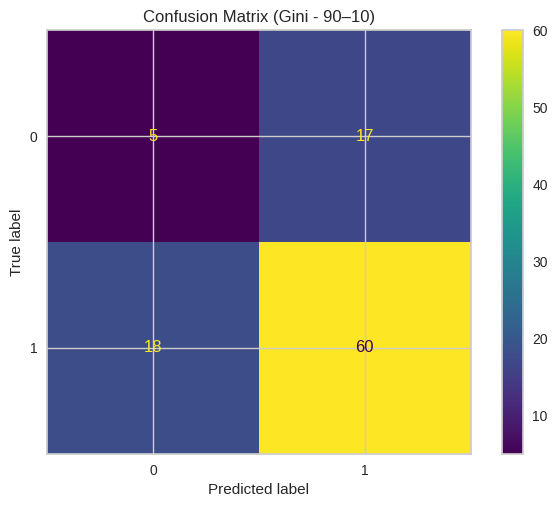

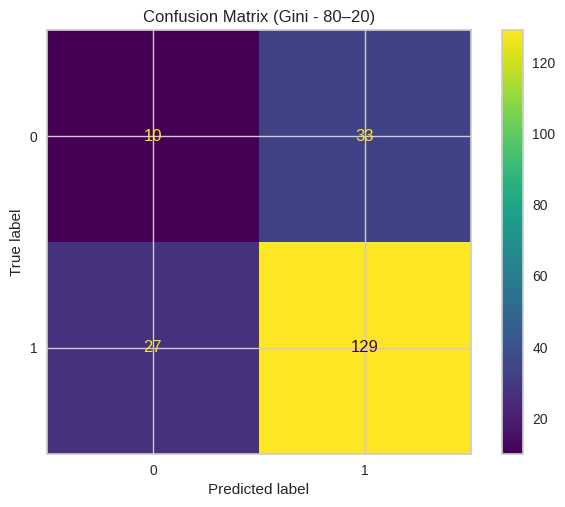

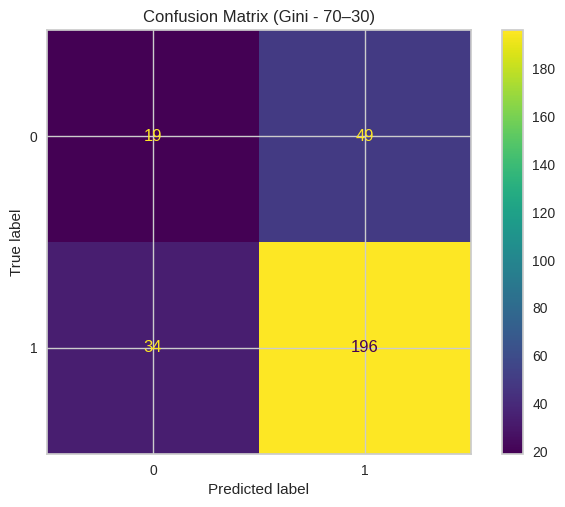

In [77]:
# Visualizing confusion matrices for Gini
ConfusionMatrixDisplay.from_predictions(Y_test_10, y_pred_gini_90)
plt.title("Confusion Matrix (Gini - 90–10)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_20, y_pred_gini_80)
plt.title("Confusion Matrix (Gini - 80–20)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_30, y_pred_gini_70)
plt.title("Confusion Matrix (Gini - 70–30)")
plt.show()


### **Visualising and Saving the Decision Tree (Gini)**
---
The 70–30 model achieves the strongest performance and its tree shows clear decision boundaries.

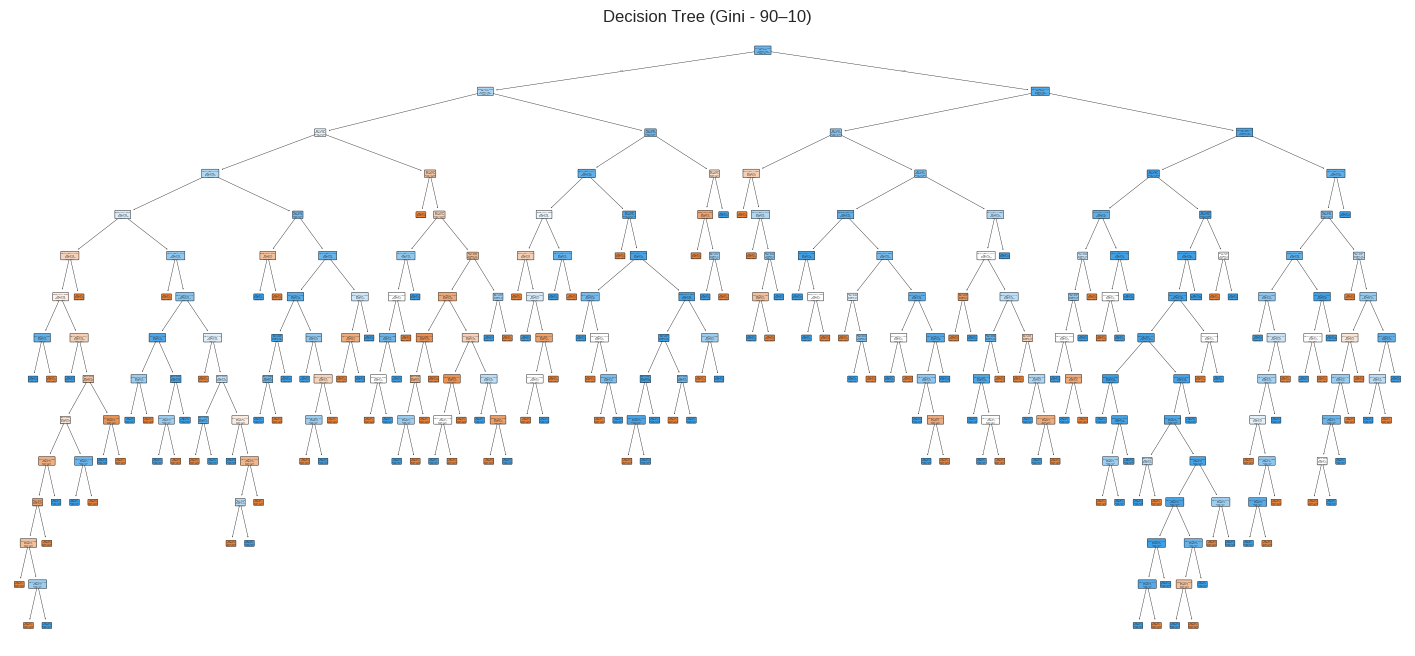

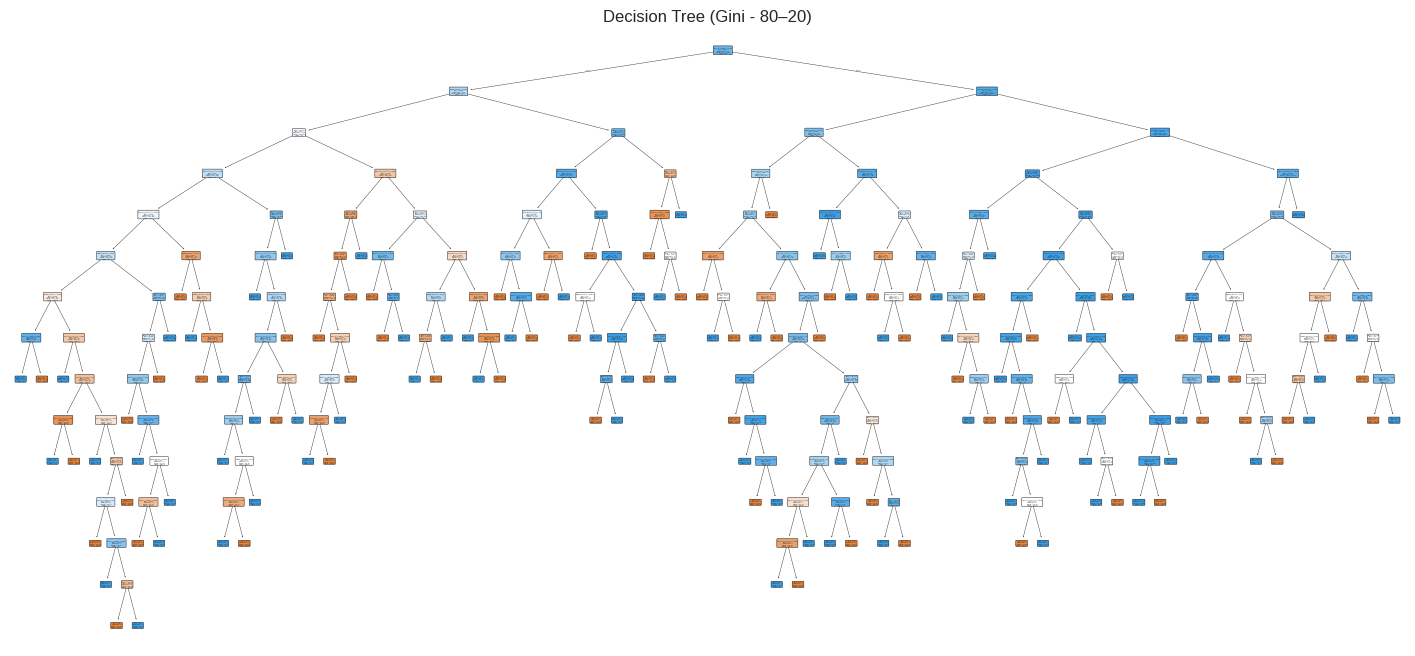

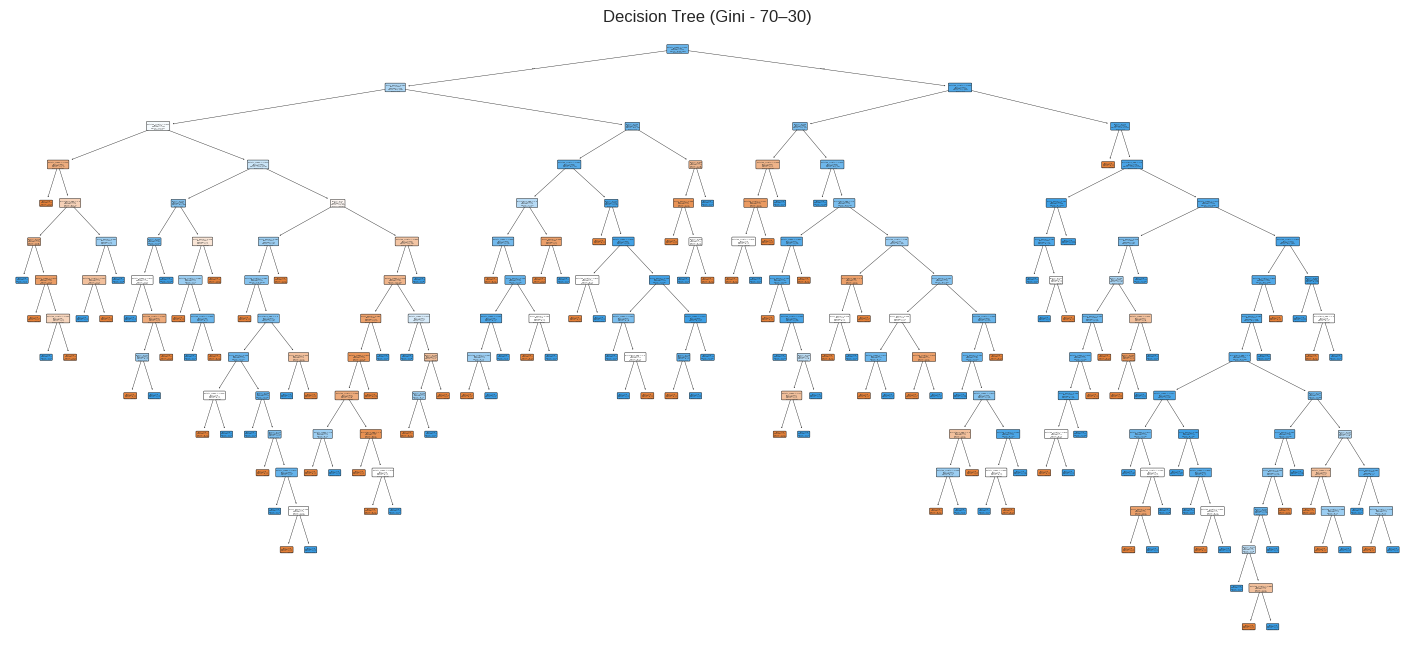

In [78]:
plt.figure(figsize=(18,8))
plot_tree(clf_gini_90, filled=True, feature_names=X.columns, class_names=['Not fit','Fit'], rounded=True)
plt.title("Decision Tree (Gini - 90–10)")
plt.show()

plt.figure(figsize=(18,8))
plot_tree(clf_gini_80, filled=True, feature_names=X.columns, class_names=['Not fit','Fit'], rounded=True)
plt.title("Decision Tree (Gini - 80–20)")
plt.show()

plt.figure(figsize=(18,8))
plot_tree(clf_gini_70, filled=True, feature_names=X.columns, class_names=['Not fit','Fit'], rounded=True)
plt.title("Decision Tree (Gini - 70–30)")
plt.show()

## **Final Comparison & Discussion of Results (Entropy vs. Gini)**

After applying the Decision Tree classifier using two attribute selection measures — Information Gain (Entropy) and Gini Index — across three training/testing splits (90–10, 80–20, 70–30), the following section summarizes and compares their performance on the fitness dataset.

---

### **1. Overall Accuracy Comparison**

| Criterion | 90–10 | 80–20 | 70–30 |
|----------|--------|--------|--------|
| Entropy (IG) | 67% | 69% | 70% |
| Gini | 65% | 70% | 72% |

- Best Entropy performance: 70–30 split (70%)  
- Best Gini performance: 70–30 split (72%)  
- Best overall model: Decision Tree (Gini, 70–30 split)

Both criteria show improved generalization when evaluated with larger test sets.

---

### **2. Behavior of Entropy vs. Gini**

#### **Entropy (Information Gain)**
Entropy reduces uncertainty and prioritizes splits that provide the most information. Across all splits, it shows:

- High sensitivity (recall), identifying most fit individuals  
- Moderate precision  
- Low specificity, often predicting not-fit individuals as fit  

Interpretation:  
Entropy is effective at detecting the positive class (fit), but struggles with accurately identifying not-fit individuals.

---

#### **Gini Index**
Gini minimizes impurity and often performs more consistently with imbalanced datasets. It shows:

- High sensitivity and precision  
- Better specificity than entropy  
- Higher overall accuracy, particularly in the 70–30 split  

Interpretation:  
Gini provides a stronger balance across both classes and is more reliable for this dataset.

---

### **3. Confusion Matrix Interpretation**

Across all splits:

- True Positives (fit classified as fit) are consistently high  
- False Positives are the primary source of error  
- Entropy produces more false positives than Gini  
- The Gini 70–30 confusion matrix shows the clearest separation between correct and incorrect predictions

Visual representations in the notebook confirm that:

- Decision trees become more expressive at higher test sizes  
- Confusion matrices clearly show that Gini is more balanced than Entropy  
- Entropy heavily favors predicting the positive class

---

### **4. Why the 70–30 Split Performs Best**

The highest accuracy for both measures appears in the 70–30 split because:

- A larger test set provides more diverse evaluation samples  
- The model avoids overfitting when trained with slightly less data  
- Generalization improves when tested on a more representative dataset  

---

### **5. Best Model per Partition**

- 90–10: Entropy (67%)  
- 80–20: Gini (70%)  
- 70–30: Gini (72%)  

Overall Best Model:  
Decision Tree using Gini Index with a 70–30 split (72% accuracy)

This configuration provides the strongest performance, the best balance between sensitivity and specificity, and the lowest error rate.

---

### **6. Final Conclusion**

Both algorithms effectively identify fit individuals; however:

- Entropy is more sensitive but less specific  
- Gini is more stable, more balanced, and achieves higher accuracy  

The most effective configuration for this dataset is:

Decision Tree using the Gini Index with a 70–30 split.  
This model demonstrates the best generalization, highest accuracy, and most reliable predictive performance overall.


## **Clustring**
---


### **Cluster Validation Using KMeans**
KMeans is an unsupervised clustering algorithm that groups data points into k clusters based on similarity across features. It works by assigning each data point to the nearest cluster center, recalculating the centers, and repeating this process until the clusters stabilize. This helps uncover natural patterns and relationships within the dataset.

In this analysis, the target column “is_fit” was removed before clustering. Since KMeans is unsupervised, excluding the class label ensures that clusters are formed purely based on feature similarity, allowing unbiased grouping without depending on predefined labels.

In [79]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Preprocessed_dataset.csv')
target_column = df.columns[-1]
print(target_column)
# Drop the target column
features = df.drop('is_fit', axis=1)

is_fit


### **Scaling**

Scaling is an essential preprocessing step before applying KMeans. Because the fitness dataset contains features with different numeric ranges, unscaled data can distort distance calculations. Using StandardScaler, each feature is standardized so they contribute equally to the clustering results. This leads to more accurate, meaningful, and balanced clusters when KMeans is applied.

In [80]:
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
fitness_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
display(fitness_scaled.head())


Scaled DataFrame:


activity_index  nutrition_quality  discretized_age   sleep_hours       BMI
0        0.591889          -1.149999         0.137987 -2.076368e-08  0.134966
1       -0.121665           1.099453         1.393793 -8.812395e-02  0.059440
2        0.326594           0.189128        -1.117819 -4.323346e-01 -0.416261
3        1.378628           1.514196         1.393793  2.560867e-01  0.608413
4        1.497554           0.994010        -1.117819 -7.077031e-01 -1.217739

### **K-Means Algorithm**
---
The KMeans algorithm was applied using different values of K = 5, 6, and 7, allowing us to examine how the number of clusters affects the grouping of individuals in the fitness dataset.

- K = 5: Divides the dataset into five broader groups.

- K = 6: Creates six subgroups, capturing more detailed segmentations.

- K = 7: Produces a finer clustering structure, reflecting subtle differences between individuals.

These cluster configurations help reveal patterns related to fitness characteristics and health behavior within the dataset, even without the target label.

#### **Clustering Visualization (K = 5)**

Using k = 5, KMeans produced five distinct clusters with their corresponding centers.
The silhouette visualization generated using Yellowbrick shows an average silhouette score of approximately 0.146, indicating moderate separation between clusters.
Most cluster samples show positive silhouette values, meaning they are well-matched to their assigned cluster. Points near zero or negative values suggest slight overlap between cluster boundaries.


Cluster Centers:
[[ 0.05200231  0.07308381  0.0873494   0.23203667  1.71514933]
 [ 0.40540049  0.49110347 -0.71090997 -1.00660843 -0.16346674]
 [-0.74962518  0.62462271 -0.45651711  0.82003595 -0.23579877]
 [-0.09442124 -1.21250534 -0.15641464  0.11677907 -0.17235329]
 [ 0.3846121   0.51146919  1.07433322 -0.15191703 -0.40366384]]

Cluster Labels:
[3 4 1 4 1 4 2 3 3 1 1 2 4 0 1 2 4 4 1 1 3 3 4 4 3 4 1 4 1 4 0 0 2 3 1 2 2
 4 4 1 2 0 4 1 1 3 0 1 1 4 3 1 1 2 2 0 2 1 2 3 2 2 2 4 3 1 4 4 3 4 4 2 4 4
 1 4 1 1 4 4 4 1 0 3 0 0 1 1 1 4 3 0 3 4 4 4 4 2 1 4 1 4 0 0 3 2 0 2 4 4 3
 3 3 0 3 4 2 0 0 2 2 1 2 3 1 0 2 2 0 4 1 2 3 4 1 2 3 4 4 1 1 3 4 0 4 1 3 2
 2 2 4 3 4 2 2 3 0 1 4 1 4 3 4 1 2 4 0 4 2 3 3 4 0 3 3 3 4 4 1 3 3 1 4 3 4
 4 1 4 2 2 4 3 3 1 4 4 4 4 4 4 3 1 3 3 4 1 0 1 0 1 2 4 4 3 3 4 2 3 4 4 4 4
 4 4 2 4 4 4 1 2 4 1 4 4 3 4 1 1 4 3 1 2 1 0 3 0 3 2 2 3 2 1 3 3 2 4 2 0 2
 2 1 3 3 0 3 1 4 0 1 3 4 2 0 0 2 4 3 3 3 1 3 0 2 0 3 2 2 0 1 1 3 3 1 3 3 2
 1 4 3 3 3 1 2 4 1 3 1 1 3 2 3 0 3 4 4 4 4 3 0 1 2

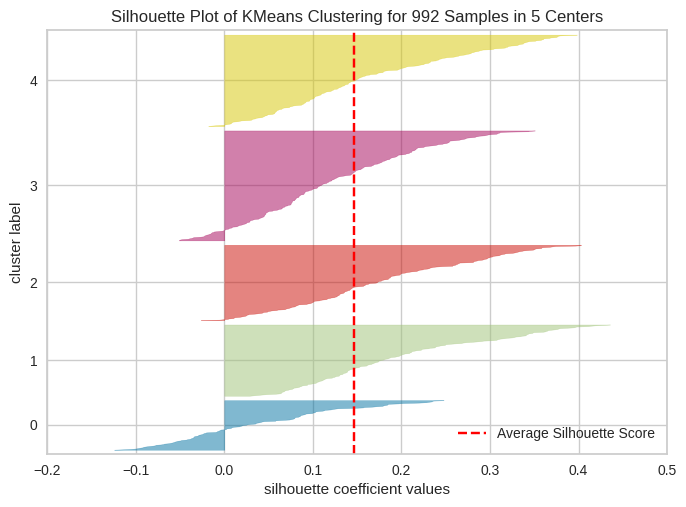

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 992 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [81]:
# Set a seed for random number generation
np.random.seed(42)
# Run k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_result = kmeans.fit(fitness_scaled)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(fitness_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

#### **Clustering Visualization (K = 6)**

For k = 6, KMeans identified six clusters with updated centers.
The average silhouette score became around 0.157, indicating moderate clarity among groups.
Although most clusters are reasonably well-defined, some overlap persists.
This configuration offers a more detailed segmentation of the individuals in the dataset.

Cluster Centers:
[[ 0.20027562  0.22402705 -0.28061522  0.17817731  1.84556879]
 [ 0.40560557  0.54685076 -0.72587973 -1.06145493 -0.19386919]
 [-0.63020667  0.68928401 -0.57846662  0.94272547 -0.27931445]
 [ 0.20259499 -1.17308475 -0.52987366  0.19556876 -0.19519657]
 [ 0.78228484  0.44495546  0.99481261 -0.09830623 -0.455228  ]
 [-1.07121849 -0.25544856  0.93781547 -0.13218235  0.1288466 ]]

Cluster Labels:
[3 4 1 4 1 4 2 3 3 1 1 2 4 0 1 2 4 4 1 1 3 5 4 4 3 5 1 4 1 4 0 0 2 3 1 2 2
 4 5 0 5 0 4 1 0 3 0 3 1 2 5 1 1 2 2 4 2 1 2 3 2 2 2 4 3 3 4 4 3 4 4 2 4 5
 4 4 1 1 4 4 4 1 3 3 4 0 1 1 1 4 5 0 5 5 4 4 4 2 1 4 1 5 0 0 3 2 0 2 4 4 3
 3 3 0 3 5 2 0 5 2 2 1 2 5 1 0 2 2 0 4 1 2 3 4 1 2 3 4 4 3 1 5 5 0 5 1 3 2
 2 2 4 3 5 2 5 3 0 1 5 1 4 3 4 1 2 4 5 4 2 3 3 4 0 3 5 3 4 4 3 3 3 1 4 3 5
 5 1 4 2 2 4 3 3 1 4 4 4 4 4 4 3 1 3 3 4 1 0 1 3 1 2 4 4 3 3 4 2 3 4 4 4 4
 4 5 2 4 4 4 1 2 4 4 4 5 5 4 1 1 4 3 1 2 1 0 5 0 3 2 2 3 5 4 3 3 2 4 2 0 2
 2 5 3 3 0 5 1 4 3 1 5 4 2 0 0 5 4 3 3 3 1 3 5 2 0 3 2 2 0 1 1

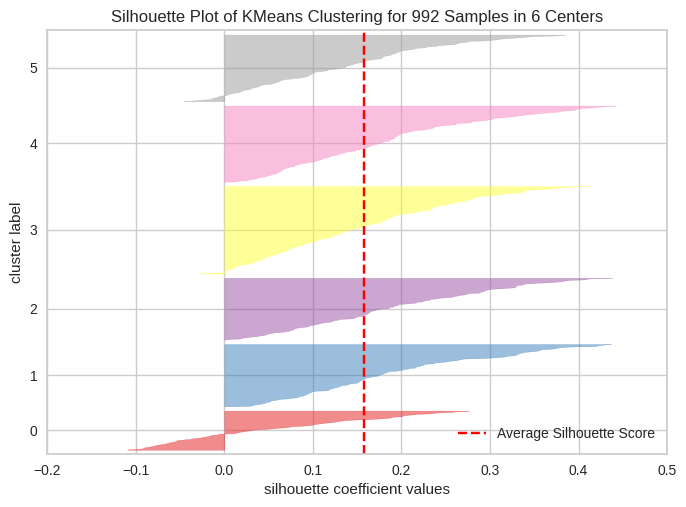

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 992 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
# Set a seed for random number generation
np. random. seed (42)
# Run k-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans_result = kmeans. fit (fitness_scaled)

# Print the clustering result
print("Cluster Centers:")
print (kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result. labels_)

warnings.filterwarnings("ignore") # Added to suppress warnings
visualizer = SilhouetteVisualizer(kmeans, color="yellowbrick" )
visualizer.fit(fitness_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

#### **Clustering Visualization (K = 7)**

With k = 7, KMeans produced seven clusters with distinct centers that group individuals based on similar fitness and health characteristics.
The silhouette score (≈ 0.16) shows slightly better separation than previous runs.
Most data points fit well within their clusters, with only limited overlap.
This configuration offers a clearer and more refined segmentation compared to K = 5 and K = 6.

Cluster Centers:
[[ 0.32394847  0.08851232 -0.30078881  0.17785594  1.98411132]
 [ 0.54342252  0.61865127 -0.69367278 -0.98283424 -0.13475389]
 [-0.47716211  0.72428218 -0.57334386  1.06443793 -0.25321155]
 [ 0.77034058 -1.17036551 -0.07704852  0.4941679  -0.29840927]
 [ 0.77175004  0.56565255  0.9896252  -0.12688066 -0.43602074]
 [-1.08524721  0.03301162  1.02786242 -0.13544662  0.20010785]
 [-0.85827947 -0.95048715 -0.7253798  -0.33463566 -0.13128524]]

Cluster Labels:
[3 4 1 4 1 4 2 6 3 1 1 6 4 0 1 2 4 4 1 1 6 6 4 4 3 5 1 3 1 4 0 0 2 3 6 2 2
 5 5 1 5 0 4 1 0 3 0 1 5 4 5 1 1 2 2 3 2 1 2 6 2 2 2 4 6 3 4 4 6 4 3 5 3 5
 4 4 1 1 4 4 4 1 3 2 4 0 1 1 1 4 3 0 6 5 4 4 4 2 6 4 1 5 0 0 3 6 0 2 5 4 3
 6 3 2 6 5 2 0 5 2 2 1 2 5 1 0 2 2 5 4 6 2 3 4 6 2 3 4 4 3 1 6 5 0 5 6 3 6
 2 2 4 6 5 2 5 6 0 1 5 1 4 6 4 1 6 4 5 3 2 6 3 4 0 3 6 6 4 4 6 3 3 1 4 3 5
 5 1 4 2 2 4 3 3 1 4 4 4 4 3 4 3 1 6 6 4 1 0 1 0 1 5 4 4 3 3 4 2 3 4 4 4 4
 4 5 2 4 4 4 1 2 4 1 5 5 5 4 1 1 4 3 1 2 1 0 6 0 3 2 2 3 5 4 6 3 2 4 2 4 2

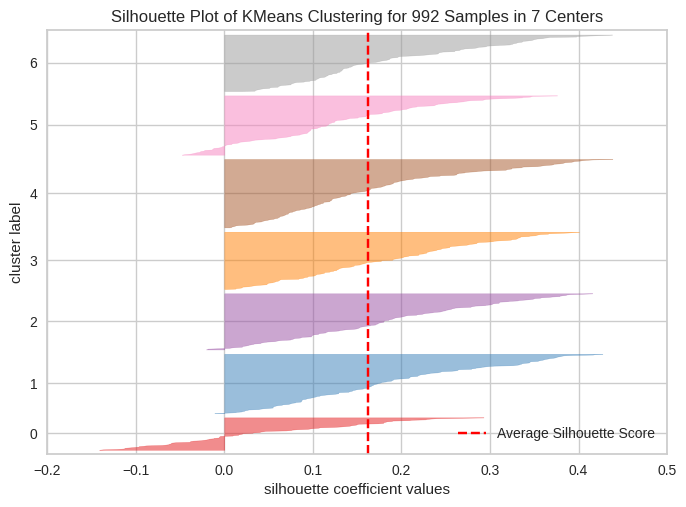

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 992 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
# Set a seed for random number generation
np.random.seed(42)
# Run k-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans_result = kmeans. fit (fitness_scaled)
# Print the clustering result
print("Cluster Centers:")
print (kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result. labels_)

visualizer = SilhouetteVisualizer(kmeans, color="YellowBrick" )
visualizer.fit(fitness_scaled)
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

### **Clustering Center Visualization**
---
Scatter plots were generated for k = 5, 6, and 7 to visually compare how the data is grouped under different cluster counts.
Each data point represents an individual, while colors show cluster membership.
Two standardized features (sleep hours and nutrition quality) were used for visualization.

As the value of K increases, clusters become more detailed and granular, revealing more fine-grained patterns in the dataset.
However, increasing K also increases the risk of over-segmentation, so choosing the optimal number of clusters is essential.

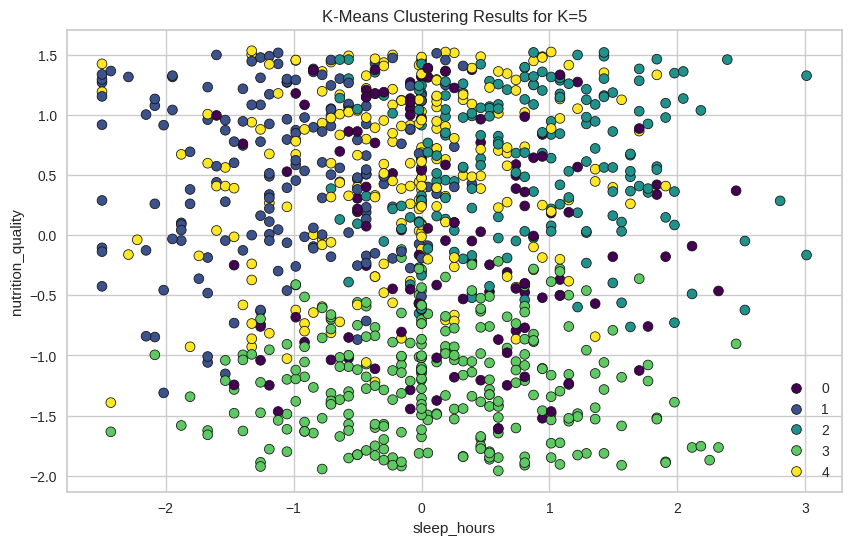

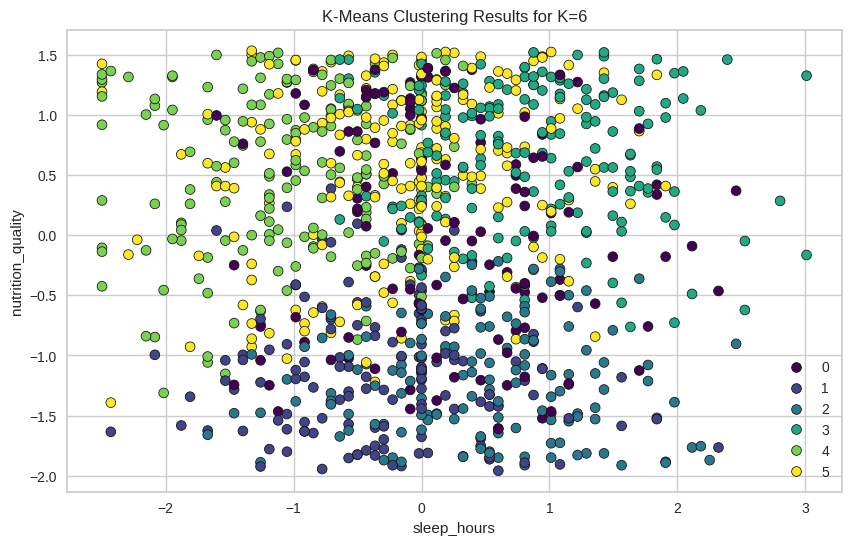

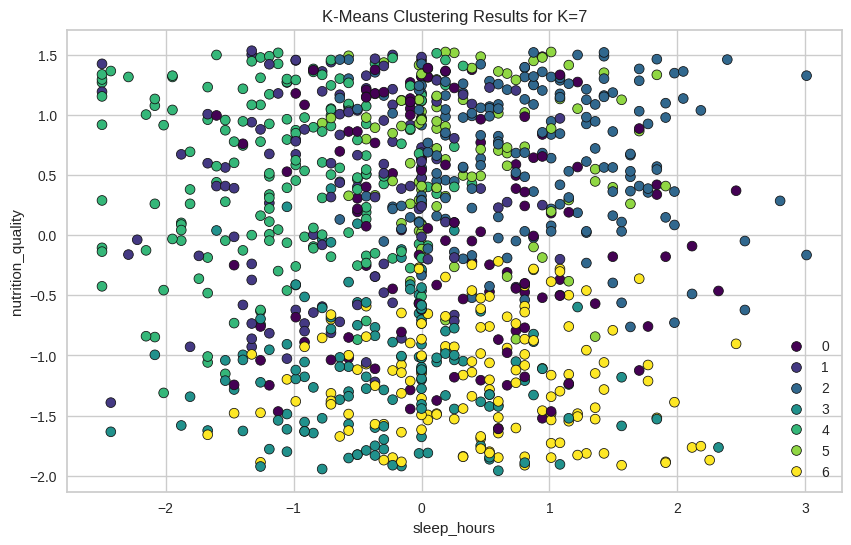

In [84]:
# Values of K to test
k_values = [5, 6, 7]

for k in k_values:
    # Run K-means clustering with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(fitness_scaled)

    # Add cluster labels to the DataFrame
    fitness_scaled['Cluster'] = kmeans_result.labels_

    # Visualize clustering using a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=fitness_scaled.columns[3],
        y=fitness_scaled.columns[1],
        hue='Cluster',
        data=fitness_scaled,
        palette='viridis',
        edgecolor='k'
    )
    plt.title(f'K-Means Clustering Results for K={k}')
    plt.xlabel(fitness_scaled.columns[3])
    plt.ylabel(fitness_scaled.columns[1])
    plt.legend()
    plt.show()

### **K-Means Clustering with Estimating K and Initializations**
---

The Calinski-Harabasz score :

- Scores peak around K = 2, showing compact and well-separated clusters.

- Additional peaks appear at K = 3 and K = 7.

- Scores drop gradually after K = 7.


The silhouette score :
- Best silhouette score = K = 2


**In summary**, while (k = 2) and (k = 3) show the strongest performance based on the Calinski-Harabasz score, (k = 7) also maintains a relatively high score. Additionally, the Silhouette score identifies (k = 2) as the optimal number of clusters, with a secondary peak at (k = 7), indicating that these values provide the best-defined segmentation of the data.

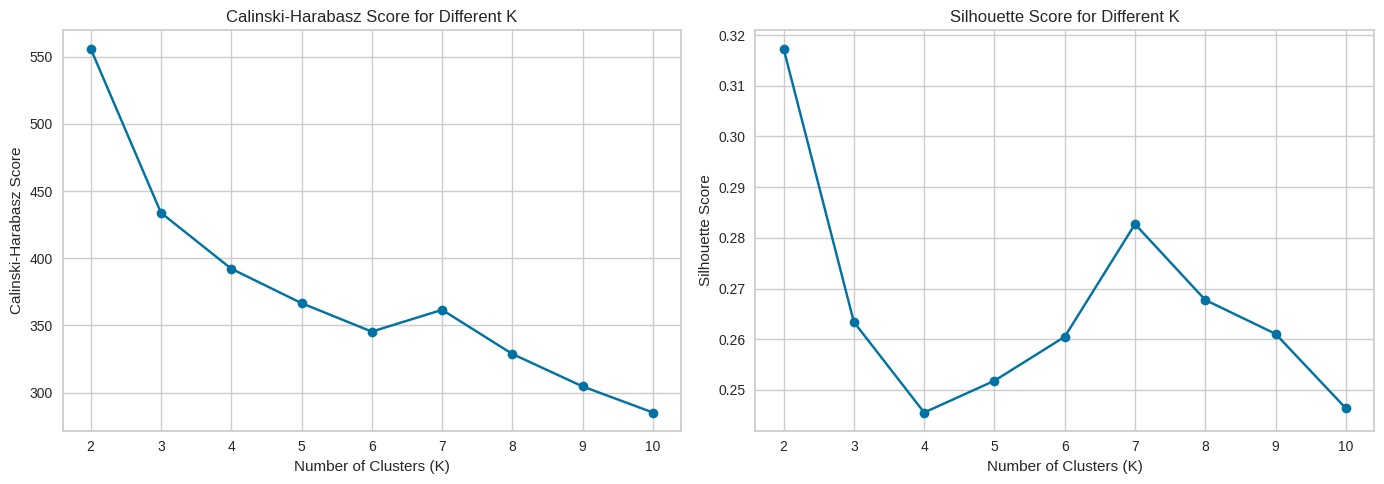

In [85]:
k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

# Calculate scores for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fitness_scaled)
    ch_score = calinski_harabasz_score(fitness_scaled, kmeans.labels_)
    silhouette_avg = silhouette_score(fitness_scaled, kmeans.labels_)
    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

# Plot the scores for comparison
plt.figure(figsize=(14, 5))

# Plot Calinski-Harabasz Score
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### **Clustering Validation:**
---
#### **Silhouette Coefficient**

The silhouette score was computed for K values from 2 to 10. The highest score was achieved at K = 2 (≈ 0.32), indicating that two clusters provide the best-defined separation and cohesion in the fitness dataset. A smaller secondary peak at K = 7 (≈ 0.28) suggests it may also form reasonably well-defined clusters.

In [86]:
K_range = range(2, 11)

# Dictionary to store results
silhouette_scores = {}
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(fitness_scaled)  # This gives the labels directly
    score = silhouette_score(fitness_scaled, clusters)  # Pass clusters directly
    silhouette_scores[K] = score
    print(f"Silhouette Score for K={K}: {score:.2f}")

Silhouette Score for K=2: 0.32
Silhouette Score for K=3: 0.26
Silhouette Score for K=4: 0.25
Silhouette Score for K=5: 0.25
Silhouette Score for K=6: 0.26
Silhouette Score for K=7: 0.28
Silhouette Score for K=8: 0.27
Silhouette Score for K=9: 0.26
Silhouette Score for K=10: 0.25


### **Elbow Method**

The Elbow Method was applied by calculating the Within-Cluster Sum of Squares (WCSS) for K values ranging from 1 to 10.

The curve shows a noticeable bend around K = 7, indicating diminishing returns beyond this point.

This suggests that 7 clusters offer a strong balance between model complexity and clustering clarity.

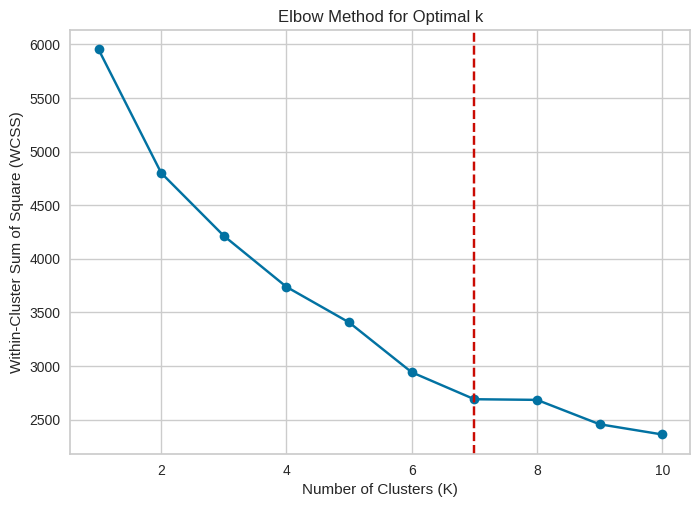

In [87]:
wss_values = []
K_values = range(1, 11)
for k in K_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(fitness_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(K_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.title('Elbow Method for Optimal k')
warnings.filterwarnings("ignore")

optimal_k = 7
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.legend()
plt.show()

### **Analysis and Justification**
---

**Silhouette Score Analysis** The silhouette score reaches its highest value at K = 2, indicating that two clusters produce the most cohesive structure with the strongest separation between groups. A smaller secondary peak also appears at K = 7, suggesting that seven clusters still form reasonably well-defined groups, though less strongly than K = 2.

**Calinski-Harabasz Score Analysis** The Calinski–Harabasz (CH) score also peaks at K = 2, reinforcing that this value offers the most compact and well-separated clustering structure. Additional notable—but smaller—peaks are observed at K = 3 and K = 7, meaning these values still provide meaningful segmentation but with weaker separation compared to K = 2.

**Elbow Method Analysis** The elbow method reveals a noticeable bend around K = 7, indicating that after this point the improvement in cluster compactness begins to level off. This makes K = 7 a reasonable option when more granular segmentation is desired.

### **Conclusion**

Overall, the combined evaluation metrics indicate that K = 2 is the optimal number of clusters, as it consistently produces the highest silhouette and CH scores, showing strong cohesion and separation. However, K = 7 also appears as a meaningful alternative: it maintains relatively high CH and silhouette values and is supported by the elbow method as a natural point of diminishing returns.

While K = 3 is acceptable due to its minor CH peak, the most strongly supported values based on your analysis are:

- Primary optimal choice: K = 2

- Secondary viable choice: K = 7

These values produce the best-defined and most meaningful segmentation of the dataset according to the provided results.


##**Summary of Research Comparison**

The results of our study align closely with the findings of the selected research papers.
 The first paper:  

**Research1**

---

showed that tree-based models, especially Random Forest, achieved the highest accuracy in classifying obesity because they capture nonlinear lifestyle and body-composition patterns effectively. This matches our findings, where Decision Trees (Gini 70–30) were the best-performing model, confirming that tree-based methods work well for fitness-related predictions and provide clear, interpretable rules.
The second paper:  

**Research2**

---

, which classified national fitness test grades, also demonstrated that machine learning can reliably evaluate physical fitness, with lifestyle-related variables (body fat, weight, flexibility, strength) being the most important. This supports our results, where lifestyle attributes strongly influenced fitness predictions, and clustering revealed meaningful fitness behavior patterns.

Overall, both research papers confirm that machine learning models especially interpretable, tree-based ones are effective and scientifically supported tools for analyzing fitness and health-related data. Our results follow the same trends, reinforcing the validity, usefulness, and meaningfulness of the insights discovered in our study.